 ### Question 3

 Are there "groups" of countries that share characteristics among macroeconomic factors, and education rates among women, and/or women's rights in those countries? For example, do countries with greater rates of education among females and more equal rights among men and women have higher GDP or longer average lifespans?


 Target variable(s) from data set: N/A, this is an unsupervised learning question 
Task type: Clustering


In [130]:
#import packages

# general
import numpy as np
import pandas as pd

# sklearn

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, kmeans_plusplus
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn import metrics
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing 
from yellowbrick.features import PCA as PCA_viz
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# visualization
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [131]:
#load in the dataset
transformed_data = pd.read_csv('transformed_data.csv')
transformed_data.head()

Unnamed: 0  Year  \
0           0  -1.0   
1           1  -0.7   
2           2   0.1   
3           3   0.5   
4           4   0.6   

   A woman can be head of household in the same way as a man (1=yes; 0=no)  \
0                                                1.0                         
1                                                1.0                         
2                                                1.0                         
3                                                1.0                         
4                                                1.0                         

   A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
0                                                1.0                         
1                                                1.0                         
2                                                1.0                         
3                                                1.0                         
4                                                1.0                         

   A woman can get a job in the same way as a man (1=yes; 0=no)  \
0                                                1.0              
1                                                1.0              
2                                                1.0              
3                                                1.0              
4                                                1.0              

   A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
0                                                1.0                                 
1                                                1.0                                 
2                                                1.0                                 
3                                                1.0                                 
4                                                1.0                                 

   A woman can open a bank account in the same way as a man (1=yes; 0=no)  \
0                                                1.0                        
1                                                1.0                        
2                                                1.0                        
3                                                1.0                        
4                                                1.0                        

   A woman can register a business in the same way as a man (1=yes; 0=no)  \
0                                                1.0                        
1                                                1.0                        
2                                                1.0                        
3                                                1.0                        
4                                                1.0                        

   A woman can sign a contract in the same way as a man (1=yes; 0=no)  \
0                                                0.0                    
1                                                0.0                    
2                                                1.0                    
3                                                1.0                    
4                                                1.0                    

   A woman can travel outside her home in the same way as a man (1=yes; 0=no)  \
0                                                1.0                            
1                                                1.0                            
2                                                1.0                            
3                                                1.0                            
4                                                1.0                            

   ...  Country Name_Ukraine  Country Name_United Arab Emirates  \
0  ...                     0                                  0   
1  ...              

In [132]:
transformed_data.columns

Index(['Unnamed: 0', 'Year',
       'A woman can be head of household in the same way as a man (1=yes; 0=no)',
       'A woman can choose where to live in the same way as a man (1=yes; 0=no)',
       'A woman can get a job in the same way as a man (1=yes; 0=no)',
       'A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)',
       'A woman can open a bank account in the same way as a man (1=yes; 0=no)',
       'A woman can register a business in the same way as a man (1=yes; 0=no)',
       'A woman can sign a contract in the same way as a man (1=yes; 0=no)',
       'A woman can travel outside her home in the same way as a man (1=yes; 0=no)',
       ...
       'Country Name_Ukraine', 'Country Name_United Arab Emirates',
       'Country Name_United Kingdom', 'Country Name_United States',
       'Country Name_Uruguay', 'Country Name_Uzbekistan',
       'Country Name_Venezuela, RB', 'Country Name_Viet Nam',
       'Country Name_West Bank and Gaza', 'Country Name

In [133]:
# Drop column that isn't real data
transformed_data = transformed_data.drop(columns=['Unnamed: 0'])

In [134]:
# Initialize data for model in dataframe called X
X = transformed_data
id_vars_names = X.columns[:53].tolist()

# Melt dataframe and make "Country" variable label encoded
X = X.melt(id_vars=id_vars_names, var_name='Country',value_name='CountryY/N')

X.loc[X['CountryY/N'] == 0, 'Country'] = np.nan

X = X.dropna(subset=['Country'])
X = X.drop(columns='CountryY/N')

label_encoder = preprocessing.LabelEncoder() 

# Update model data with new label encoded Country column 
X['Country Label'] = label_encoder.fit_transform(X['Country']) 

# Create separate dataframe not used for models that stores the Country Names
X_withCountry = X

# Remove non-numeric Country column from data for model
X = X.drop(columns=['Country', 'Country Label'])
X

Year  \
7       -0.3   
8       -0.1   
9        0.0   
10       0.1   
11       0.5   
...      ...   
143509   0.8   
144581   0.0   
144582   0.1   
144583   0.2   
144584   0.5   

        A woman can be head of household in the same way as a man (1=yes; 0=no)  \
7                                                     1.0                         
8                                                     1.0                         
9                                                     1.0                         
10                                                    1.0                         
11                                                    1.0                         
...                                                   ...                         
143509                                                1.0                         
144581                                                1.0                         
144582                                                1.0                         
144583                                                1.0                         
144584                                                1.0                         

        A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
7                                                     1.0                         
8                                                     1.0                         
9                                                     1.0                         
10                                                    1.0                         
11                                                    1.0                         
...                                                   ...                         
143509                                                0.0                         
144581                                                1.0                         
144582                                                1.0                         
144583                                                1.0                         
144584                                                1.0                         

        A woman can get a job in the same way as a man (1=yes; 0=no)  \
7                                                     1.0              
8                                                     1.0              
9                                                     1.0              
10                                                    1.0              
11                                                    1.0              
...                                                   ...              
143509                                                0.0              
144581                                                1.0              
144582                                                1.0              
144583                                                1.0              
144584                                                1.0              

        A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
7                                                     0.0                                 
8                                                     0.0                                 
9                                                     0.0                                 
10                                                    0.0                                 
11                                                    0.0                                 
...                                                   ...                                 
143509                                                0.0                                 
144581                                                0.0                                 
144582                                                0.0                                 
144583                                        

In [135]:
X_withCountry

Year  \
7       -0.3   
8       -0.1   
9        0.0   
10       0.1   
11       0.5   
...      ...   
143509   0.8   
144581   0.0   
144582   0.1   
144583   0.2   
144584   0.5   

        A woman can be head of household in the same way as a man (1=yes; 0=no)  \
7                                                     1.0                         
8                                                     1.0                         
9                                                     1.0                         
10                                                    1.0                         
11                                                    1.0                         
...                                                   ...                         
143509                                                1.0                         
144581                                                1.0                         
144582                                                1.0                         
144583                                                1.0                         
144584                                                1.0                         

        A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
7                                                     1.0                         
8                                                     1.0                         
9                                                     1.0                         
10                                                    1.0                         
11                                                    1.0                         
...                                                   ...                         
143509                                                0.0                         
144581                                                1.0                         
144582                                                1.0                         
144583                                                1.0                         
144584                                                1.0                         

        A woman can get a job in the same way as a man (1=yes; 0=no)  \
7                                                     1.0              
8                                                     1.0              
9                                                     1.0              
10                                                    1.0              
11                                                    1.0              
...                                                   ...              
143509                                                0.0              
144581                                                1.0              
144582                                                1.0              
144583                                                1.0              
144584                                                1.0              

        A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
7                                                     0.0                                 
8                                                     0.0                                 
9                                                     0.0                                 
10                                                    0.0                                 
11                                                    0.0                                 
...                                                   ...                                 
143509                                                0.0                                 
144581                                                0.0                                 
144582                                                0.0                                 
144583                                        

#### Data Exploration for potentially relevant variables

<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

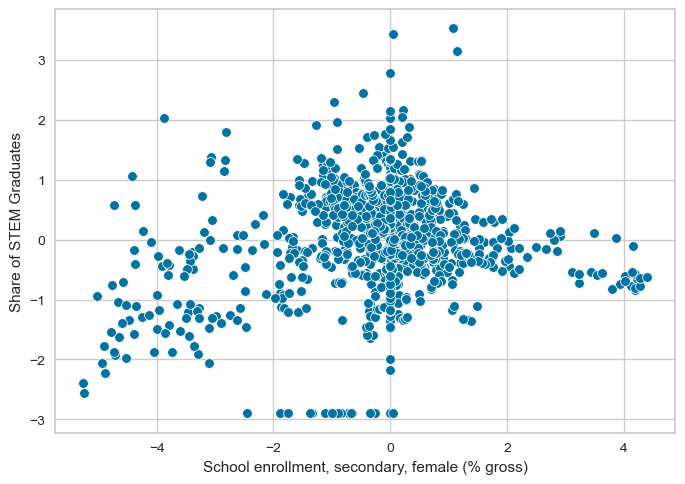

In [136]:
# Visualize School Enrollment for females in secondary school vs. Share of STEM graduates, which were variables of interest in question 1 + 2
sns.scatterplot(data=X, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates')

<Axes: xlabel='Fertility rate, total (births per woman)', ylabel='Length of paid parental leave for mother (calendar days)'>

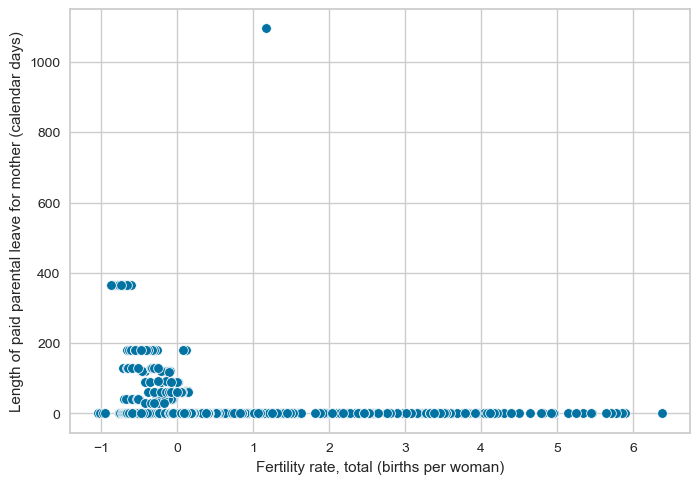

In [137]:
# Visualize two more variables with numeric data - Fertility rate and length of paid parental leave for mother
sns.scatterplot(data=X, x='Fertility rate, total (births per woman)', y='Length of paid parental leave for mother (calendar days)')

### Model 1: KMeans Clustering

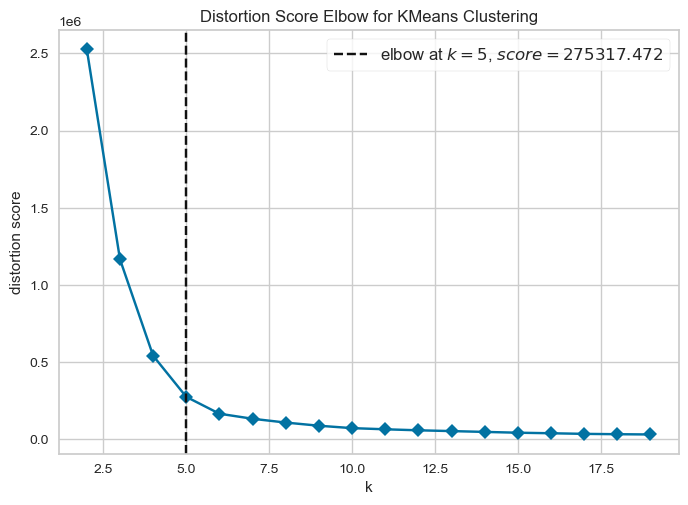

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [138]:
#Create a Kmeans model and plot the number of Ks between 2 and 20
seed = 17

model = KMeans(random_state=seed, n_init=10)

visualizer = KElbowVisualizer(model, k=(2,20), timings=False)
visualizer.fit(X)
visualizer.show()

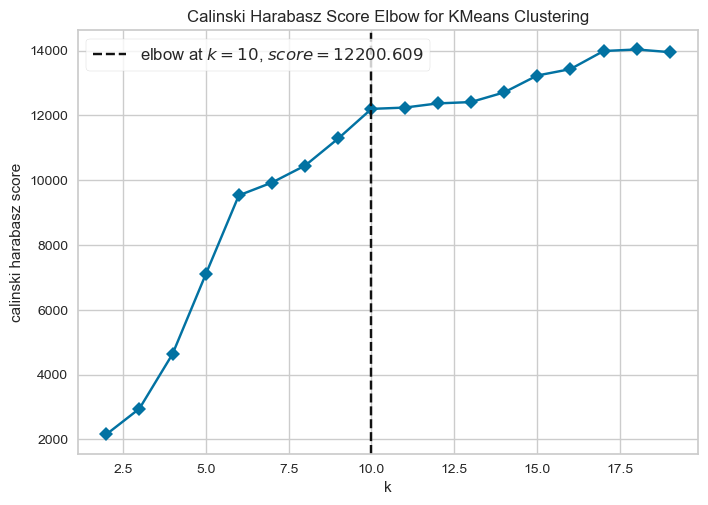

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [139]:
#Create a Kmeans model and plot the number of Ks between 2 and 20 using calinski_harabasz score

model = KMeans(random_state=seed, n_init=10)
visualizer = KElbowVisualizer(model, k=(2,20), timings=False, metric='calinski_harabasz', locate_elbow=True)
visualizer.fit(X)
visualizer.show()

The K values for these two different scores are different. 

To learn more about what k value might be best visually, plot a silhouette plot. 

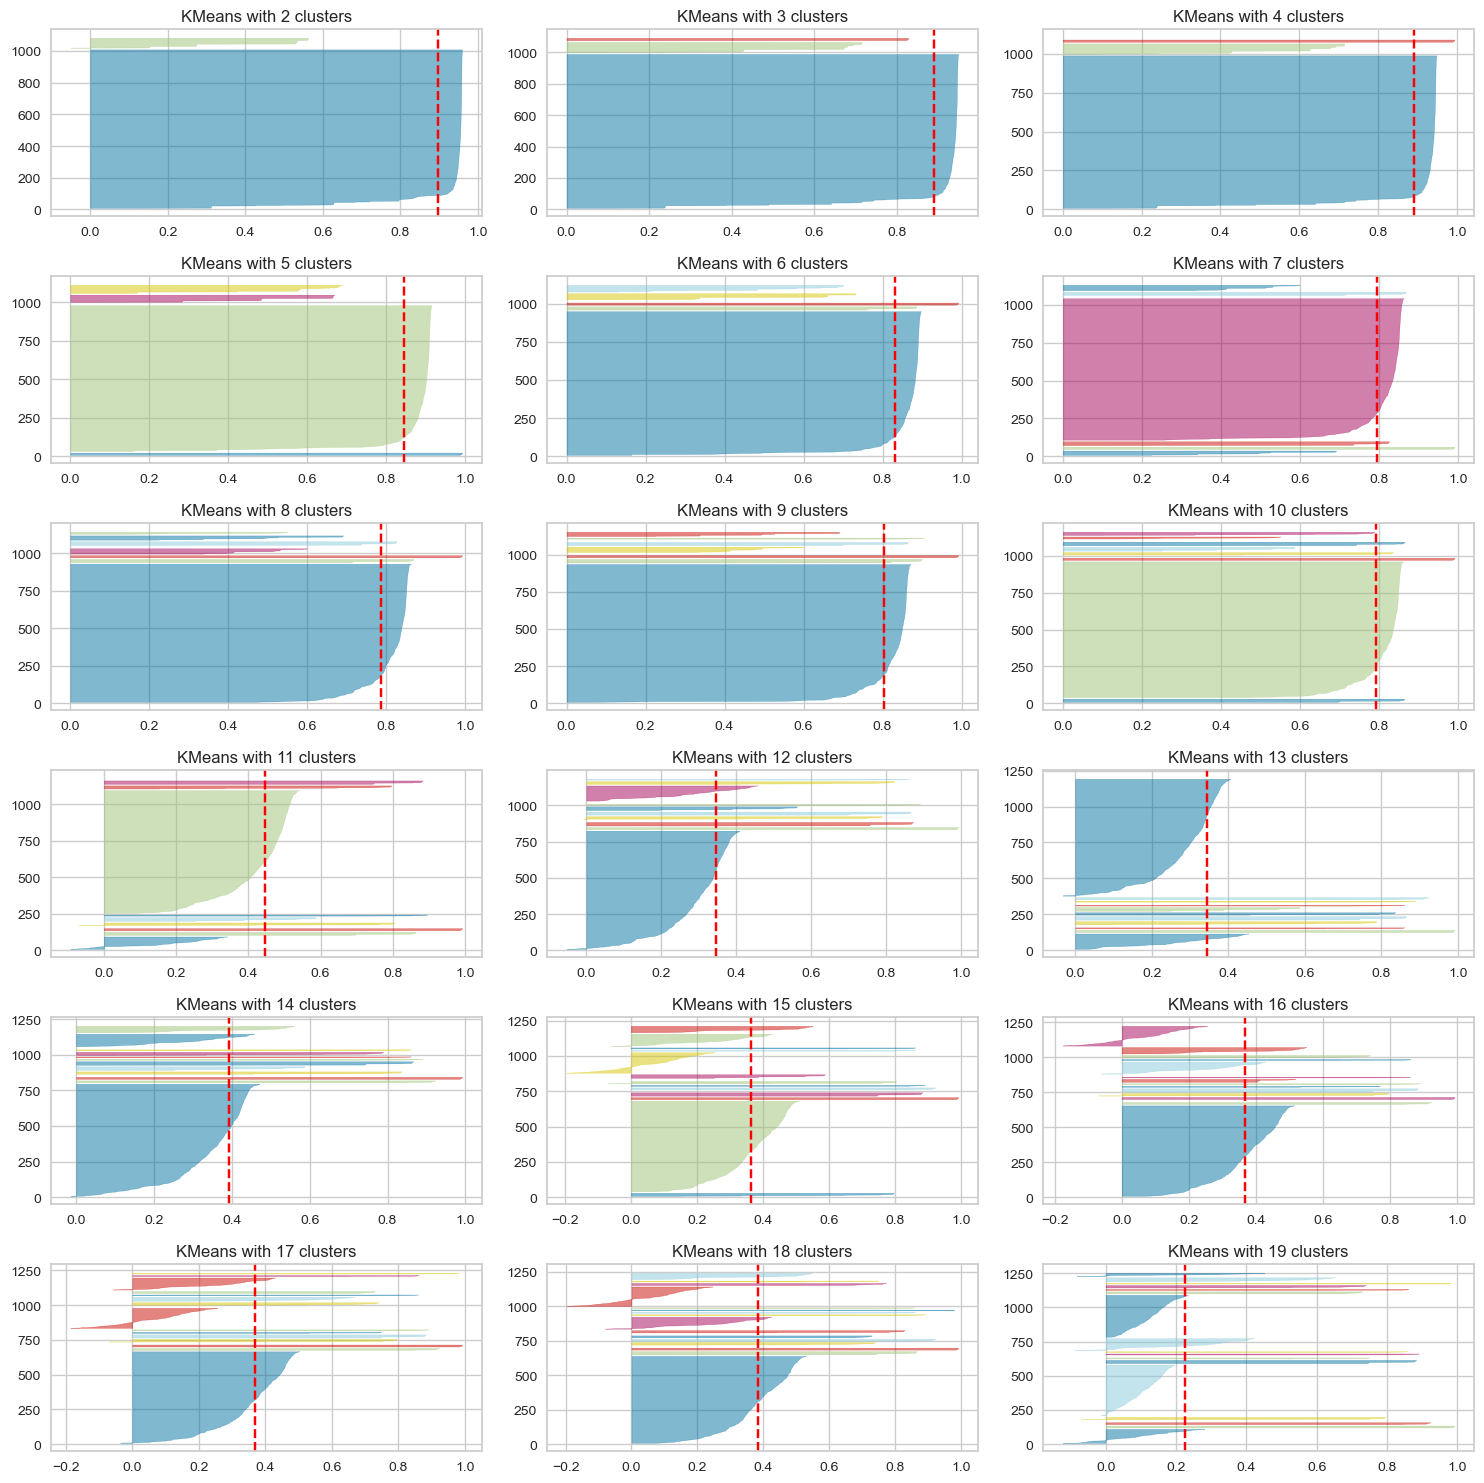

In [140]:
# Create a subplot grid
fig, ax = plt.subplots(6, 3, figsize=(15, 15))
j = 0
h = 0

for i in range(2, 20):

    # Initialize the KMeans model
    model = KMeans(random_state=seed, n_clusters=i, n_init = 10)

    # Create a SilhouetteVisualizer for the current model
    viz = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[h][j])

    # Fit the visualizer
    viz.fit(X)

    # Set the title for each subplot
    ax[h][j].set_title(f'KMeans with {i} clusters')

    # Update the subplot position
    if j < 2:
        j += 1
    else:
        j = 0
        h += 1

# Show the plot
plt.tight_layout()
plt.show()

Run a Kmeans with 5 clusters to get "final" results. 

In [141]:
# K Means Model with 3 Clusters
kmeans_final = KMeans(random_state=seed, n_clusters=5, n_init = 10)

# Step 2: Train the model using the X_test
kmeans_final.fit(X)

# Step 3: Get predictions (cluster assignments)
y_pred_test_kmeans_final = kmeans_final.labels_

# Step 4: Evaluate the model performance
silhouette_score_test_kmeans_final = silhouette_score(X, y_pred_test_kmeans_final)

print('Silhouette score:', round(silhouette_score_test_kmeans_final, 3))

Silhouette score: 0.846


In [142]:
# Save the cluster assignments as a new columns in the dataset
X_ac = X.copy()
X_ac["kmeans_labels"] = y_pred_test_kmeans_final
X_ac.head()

Year  \
7   -0.3   
8   -0.1   
9    0.0   
10   0.1   
11   0.5   

    A woman can be head of household in the same way as a man (1=yes; 0=no)  \
7                                                 1.0                         
8                                                 1.0                         
9                                                 1.0                         
10                                                1.0                         
11                                                1.0                         

    A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
7                                                 1.0                         
8                                                 1.0                         
9                                                 1.0                         
10                                                1.0                         
11                                                1.0                         

    A woman can get a job in the same way as a man (1=yes; 0=no)  \
7                                                 1.0              
8                                                 1.0              
9                                                 1.0              
10                                                1.0              
11                                                1.0              

    A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
7                                                 0.0                                 
8                                                 0.0                                 
9                                                 0.0                                 
10                                                0.0                                 
11                                                0.0                                 

    A woman can open a bank account in the same way as a man (1=yes; 0=no)  \
7                                                 1.0                        
8                                                 1.0                        
9                                                 1.0                        
10                                                1.0                        
11                                                1.0                        

    A woman can register a business in the same way as a man (1=yes; 0=no)  \
7                                                 1.0                        
8                                                 1.0                        
9                                                 1.0                        
10                                                1.0                        
11                                                1.0                        

    A woman can sign a contract in the same way as a man (1=yes; 0=no)  \
7                                                 0.0                    
8                                                 0.0                    
9                                                 0.0                    
10                                                0.0                    
11                                                0.0                    

    A woman can travel outside her home in the same way as a man (1=yes; 0=no)  \
7                                                 0.0                            
8                                                 0.0                            
9                                                 0.0                            
10                                                0.0                            
11                                                0.0                            

    A woman can work at night in the same way as a man (1=yes; 0=no)  ...  \
7                                                 0.0                 ...   
8                  

<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

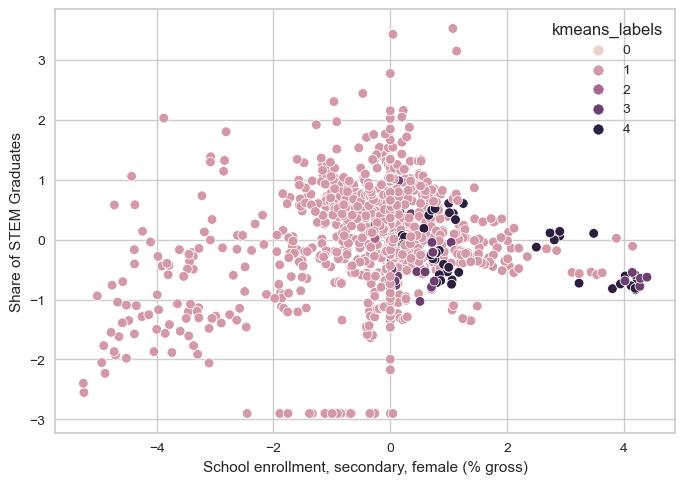

In [143]:
# Plot secondary school enrollment vs. STEM graduates and show cluster assignments
sns.scatterplot(data=X_ac, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates', hue='kmeans_labels')

<Axes: xlabel='kmeans_labels', ylabel='Share of STEM Graduates'>

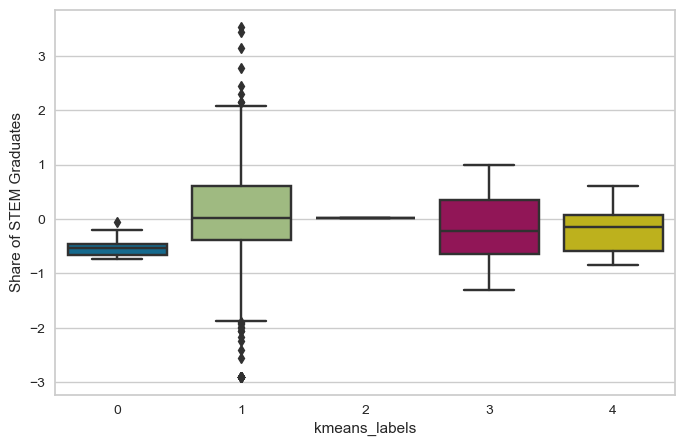

In [144]:
plt.figure(figsize=(8,5))
sns.boxplot(x='kmeans_labels', y='Share of STEM Graduates', data=X_ac)

### Feature Engineering: PCA Feature Selection

In [145]:
# Step 1: Initialize a model object
pca = PCA(random_state=seed)

# Step 2: Train the model
pca_data = pca.fit(X)

# Step 3: Get explained_variance_ratio_
pca_data.explained_variance_ratio_

array([9.10997419e-01, 7.82644141e-02, 4.34196080e-03, 1.07377273e-03,
       1.06400589e-03, 9.28069850e-04, 5.35192766e-04, 4.91498858e-04,
       4.19660897e-04, 3.59960182e-04, 2.80730826e-04, 2.33752523e-04,
       1.36134012e-04, 1.00487574e-04, 9.50328927e-05, 7.65386077e-05,
       6.43289368e-05, 5.57534436e-05, 4.63020403e-05, 4.01352426e-05,
       3.51416974e-05, 3.00297958e-05, 2.75199191e-05, 2.68483443e-05,
       2.39589473e-05, 2.21540278e-05, 2.04056971e-05, 1.89973509e-05,
       1.77890798e-05, 1.72895202e-05, 1.63866483e-05, 1.57458980e-05,
       1.24363569e-05, 1.17036526e-05, 1.16242470e-05, 1.08363396e-05,
       1.03361652e-05, 9.05653399e-06, 7.49887690e-06, 7.18216031e-06,
       6.56597887e-06, 6.00934984e-06, 5.39670580e-06, 5.15150541e-06,
       4.42770381e-06, 4.03024435e-06, 3.13204034e-06, 2.31865650e-06,
       1.91873724e-06, 1.25384990e-06, 1.11055463e-06, 4.30879485e-07,
       1.61832326e-07])

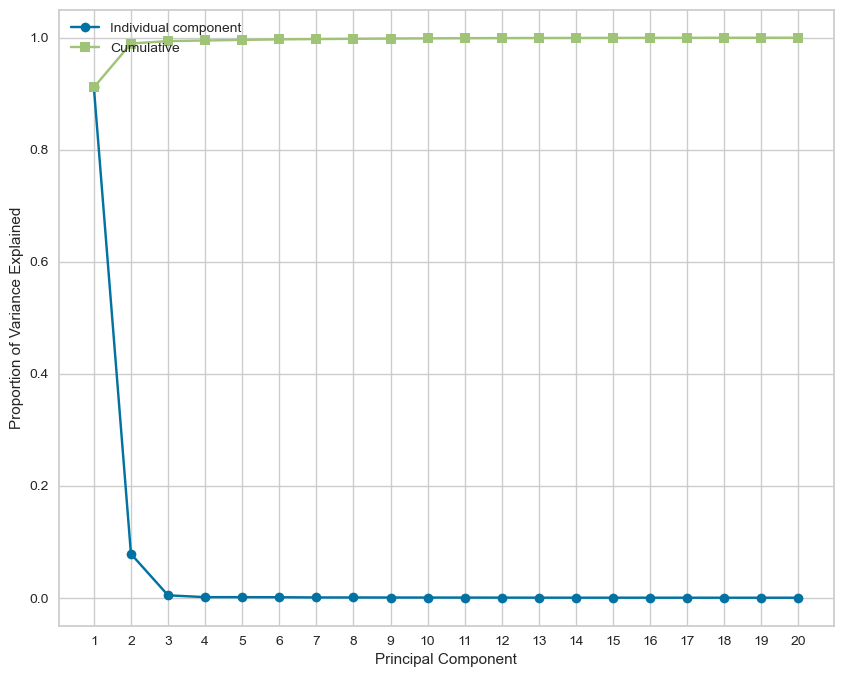

In [146]:
# Plot the variance explained ratios from the PCA to see how many components are needed to explain all of the features. 

pcidx = np.arange(1, 21)

plt.figure(figsize=(10, 8))

plt.plot(pcidx, pca_data.explained_variance_ratio_[:20], '-o', label='Individual component')
plt.plot(pcidx, np.cumsum(pca_data.explained_variance_ratio_[:20]), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xticks(pcidx)
plt.legend(loc=2)

In [147]:
# The plot appears to flatten after 4 components. Create a new dataframe that is a PCA subset with n_components=4

n_components = 4
pca = PCA(n_components=n_components, random_state=seed)
X_PCA = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3','PC4'], index=X.index)
X_PCA

PC1       PC2       PC3       PC4
7      -22.766352  1.089659 -1.212966  0.373198
8      -22.761211  1.083261 -1.044523  0.346635
9      -22.760220  1.082632 -0.994947  0.027113
10     -22.759550  1.082136 -0.892963 -0.024923
11     -22.765644  1.094600 -1.093251 -0.326461
...           ...       ...       ...       ...
143509 -22.781632  1.125635 -2.124308  0.285692
144581 -22.788534  1.133109 -2.044081  2.542056
144582 -22.789244  1.133584 -2.037581  2.569601
144583 -22.797514  1.142153 -2.029326  2.916407
144584 -22.783416  1.126773 -1.962856  2.076996

[1064 rows x 4 columns]

### Model 1: With PCA Feature Selection

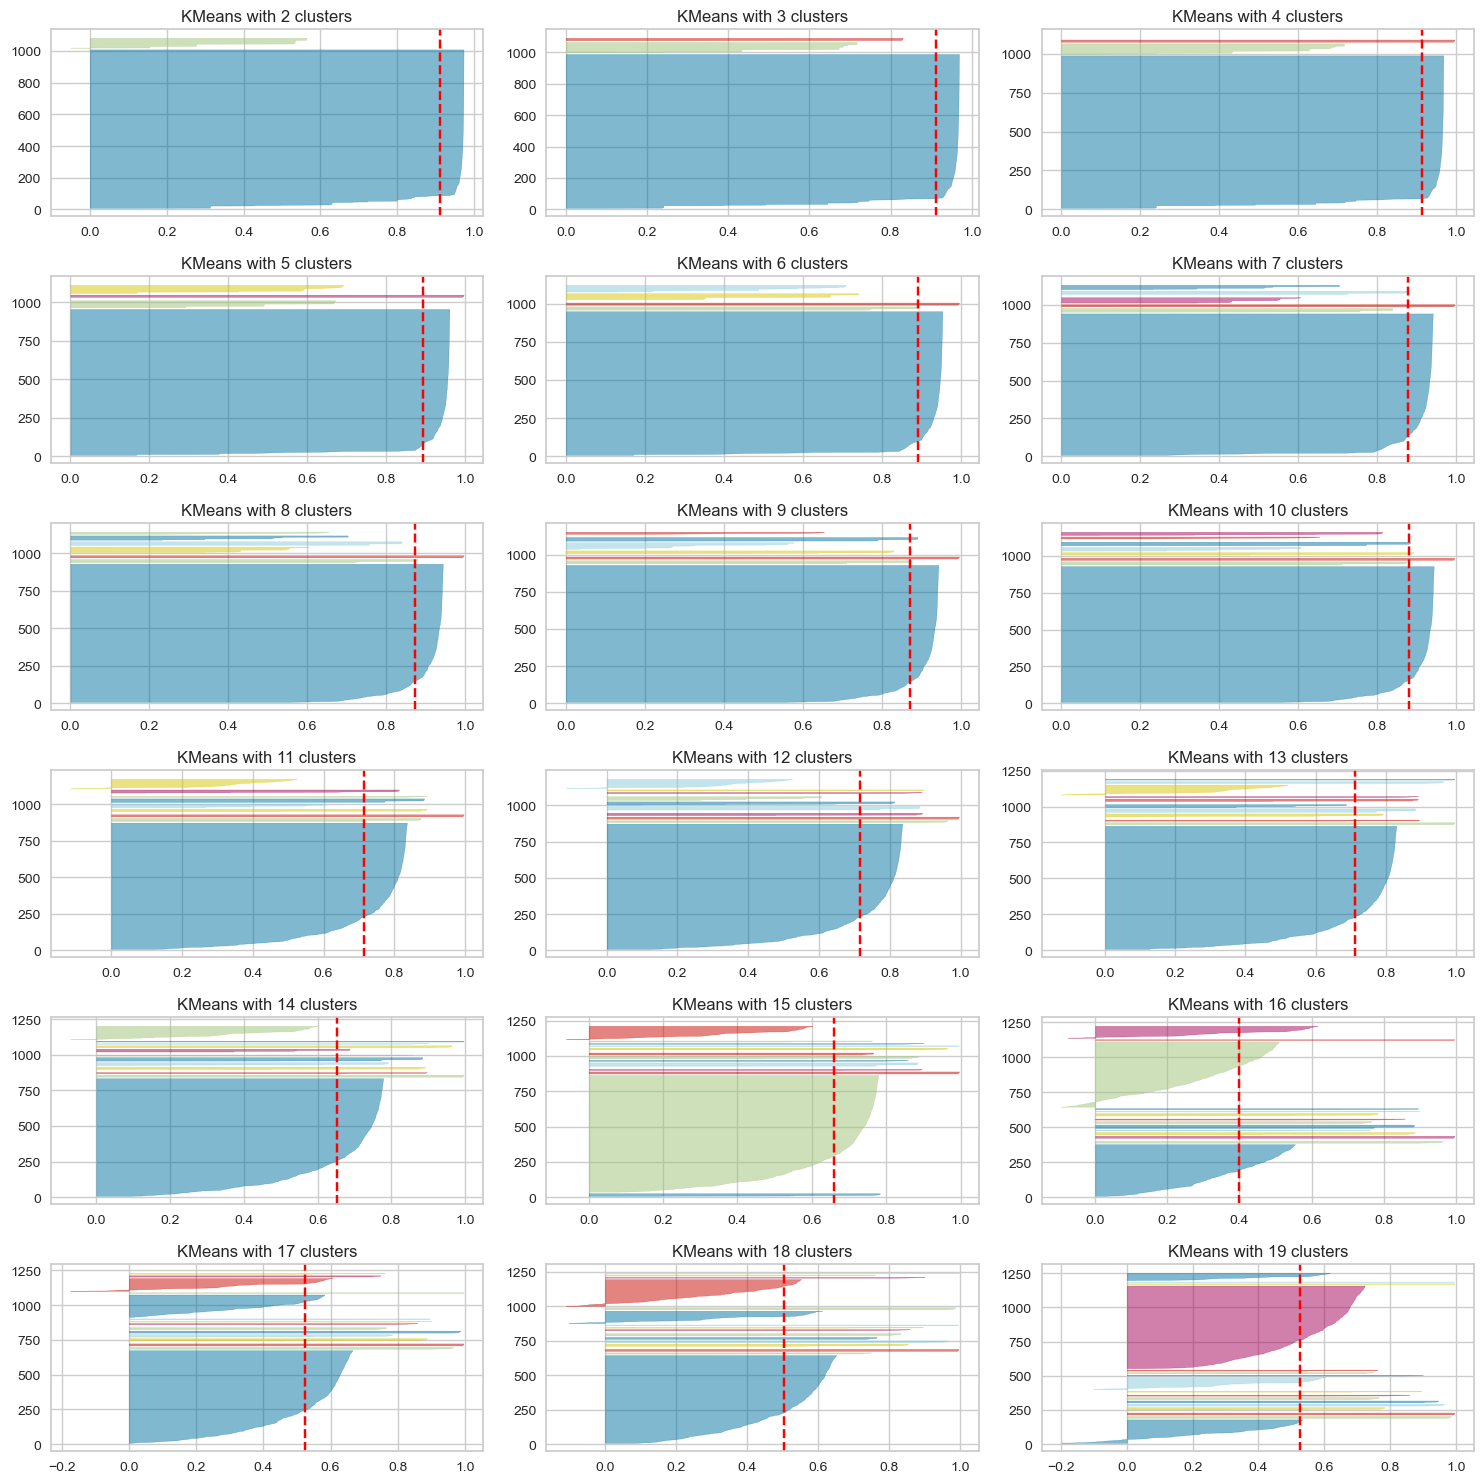

In [148]:
# Plot the silhouette plot again to see the optimal number of clusters with the PCA data

# Create a subplot grid
fig, ax = plt.subplots(6, 3, figsize=(15, 15))
j = 0
h = 0

for i in range(2, 20):

    # Initialize the KMeans model
    model = KMeans(random_state=seed, n_clusters=i, n_init = 10)

    # Create a SilhouetteVisualizer for the current model
    viz = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[h][j])

    # Fit the visualizer
    viz.fit(X_PCA)

    # Set the title for each subplot
    ax[h][j].set_title(f'KMeans with {i} clusters')

    # Update the subplot position
    if j < 2:
        j += 1
    else:
        j = 0
        h += 1

# Show the plot
plt.tight_layout()
plt.show()

In [149]:
# Train the model using 4 clusters

# Step 1: Initialize a model object
kmeans_final = KMeans(random_state=seed, n_clusters=4, n_init = 10)

# Step 2: Train the model using the X_test
kmeans_final = kmeans_final.fit(X_PCA)

# Step 3: Get predictions (cluster assignments)
y_pred_test_kmeans_final = kmeans_final.labels_

# Step 4: Evaluate the model performance
silhouette_score_test_kmeans_final = silhouette_score(X_PCA, y_pred_test_kmeans_final)

print('Silhouette score:', round(silhouette_score_test_kmeans_final, 3))

Silhouette score: 0.914


In [150]:
# Save the cluster assignments as a new columns in the dataset
X_ac["kmeans_pca_labels"] = y_pred_test_kmeans_final
X_ac

Year  \
7       -0.3   
8       -0.1   
9        0.0   
10       0.1   
11       0.5   
...      ...   
143509   0.8   
144581   0.0   
144582   0.1   
144583   0.2   
144584   0.5   

        A woman can be head of household in the same way as a man (1=yes; 0=no)  \
7                                                     1.0                         
8                                                     1.0                         
9                                                     1.0                         
10                                                    1.0                         
11                                                    1.0                         
...                                                   ...                         
143509                                                1.0                         
144581                                                1.0                         
144582                                                1.0                         
144583                                                1.0                         
144584                                                1.0                         

        A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
7                                                     1.0                         
8                                                     1.0                         
9                                                     1.0                         
10                                                    1.0                         
11                                                    1.0                         
...                                                   ...                         
143509                                                0.0                         
144581                                                1.0                         
144582                                                1.0                         
144583                                                1.0                         
144584                                                1.0                         

        A woman can get a job in the same way as a man (1=yes; 0=no)  \
7                                                     1.0              
8                                                     1.0              
9                                                     1.0              
10                                                    1.0              
11                                                    1.0              
...                                                   ...              
143509                                                0.0              
144581                                                1.0              
144582                                                1.0              
144583                                                1.0              
144584                                                1.0              

        A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
7                                                     0.0                                 
8                                                     0.0                                 
9                                                     0.0                                 
10                                                    0.0                                 
11                                                    0.0                                 
...                                                   ...                                 
143509                                                0.0                                 
144581                                                0.0                                 
144582                                                0.0                                 
144583                                        

<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

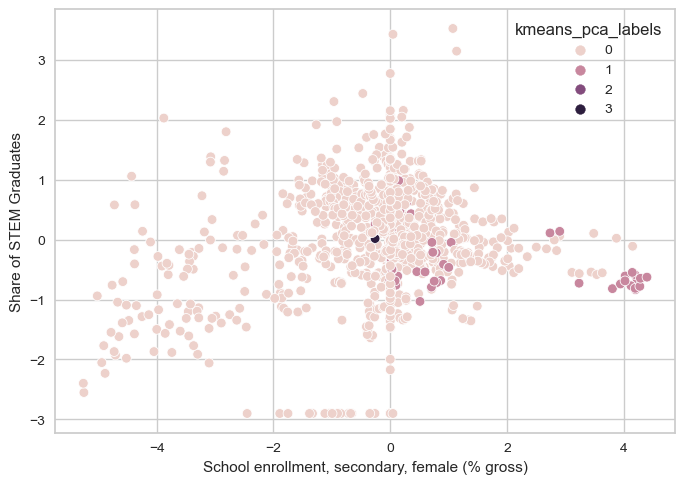

In [151]:
sns.scatterplot(data=X_ac, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates', hue='kmeans_pca_labels')


<Axes: xlabel='kmeans_pca_labels', ylabel='Share of STEM Graduates'>

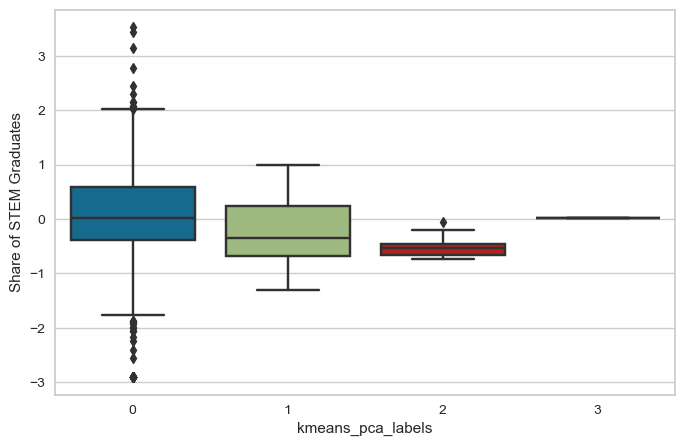

In [152]:
plt.figure(figsize=(8,5))
sns.boxplot(x='kmeans_pca_labels', y='Share of STEM Graduates', data=X_ac)

There is still a fair amount of overlap in the clusters and interpreting the results to gather insights may be challenging. 

### Model 2: Agglomerative Clustering

Train an initial model using the original dataset (X)

In [153]:
# Step 1: Initialize a model object
agg_clustering = AgglomerativeClustering()

# Step 2: Train the model
agg_clustering.fit(X)

# Step 3: Get predictions (cluster assignments)
y_pred_train_agg_clustering = agg_clustering.labels_

# Step 4: Evaluate the model performance
silhouette_score_train_agg = silhouette_score(X, y_pred_train_agg_clustering)

print('Silhouette score:', round(silhouette_score_train_agg, 3))
print('Number of Clusters (default model):', round(agg_clustering.n_clusters_, 3))

Silhouette score: 0.897
Number of Clusters (default model): 2


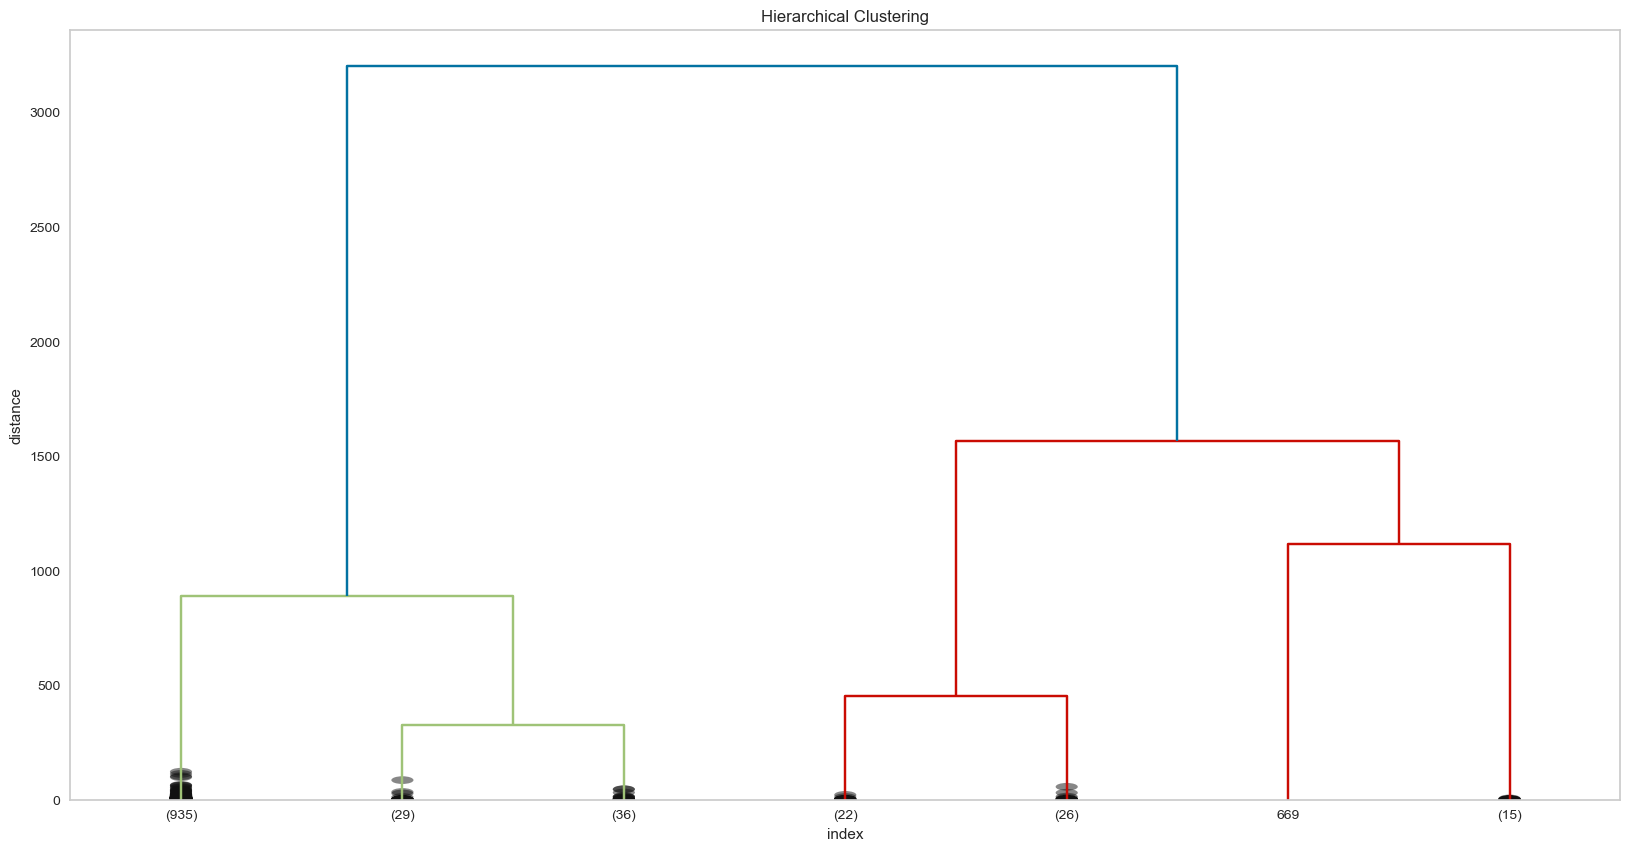

In [154]:
# Explore how many clusters to use using dendograms. Compare various linkage metrics. 

#ward linkage
Z = linkage(X,method='ward',metric='euclidean')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

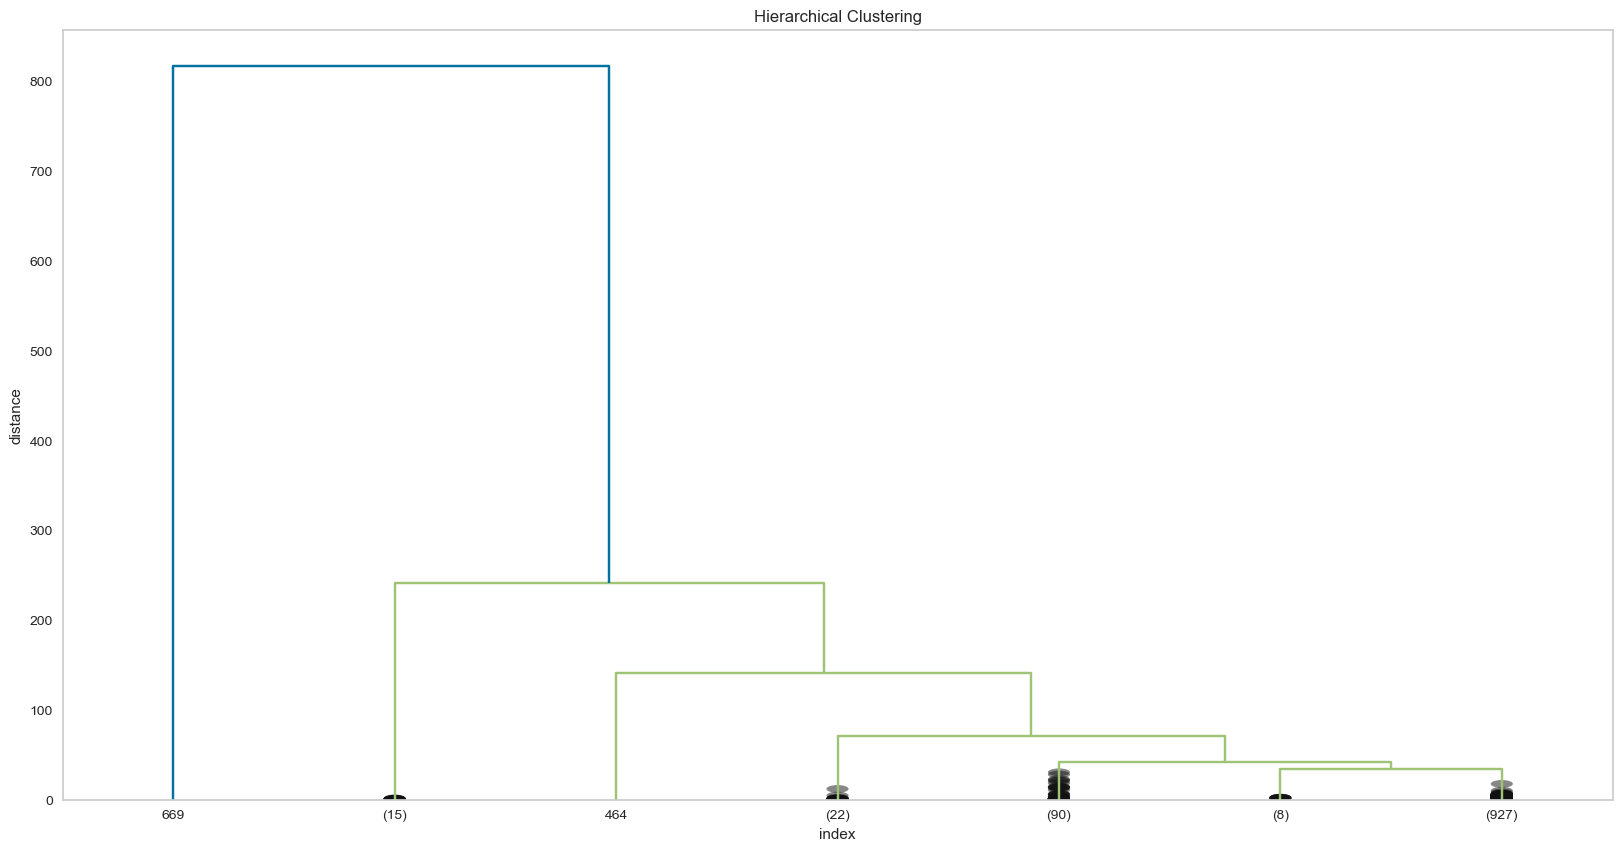

In [155]:
#single linkage
Z = linkage(X,method='single',metric='euclidean')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

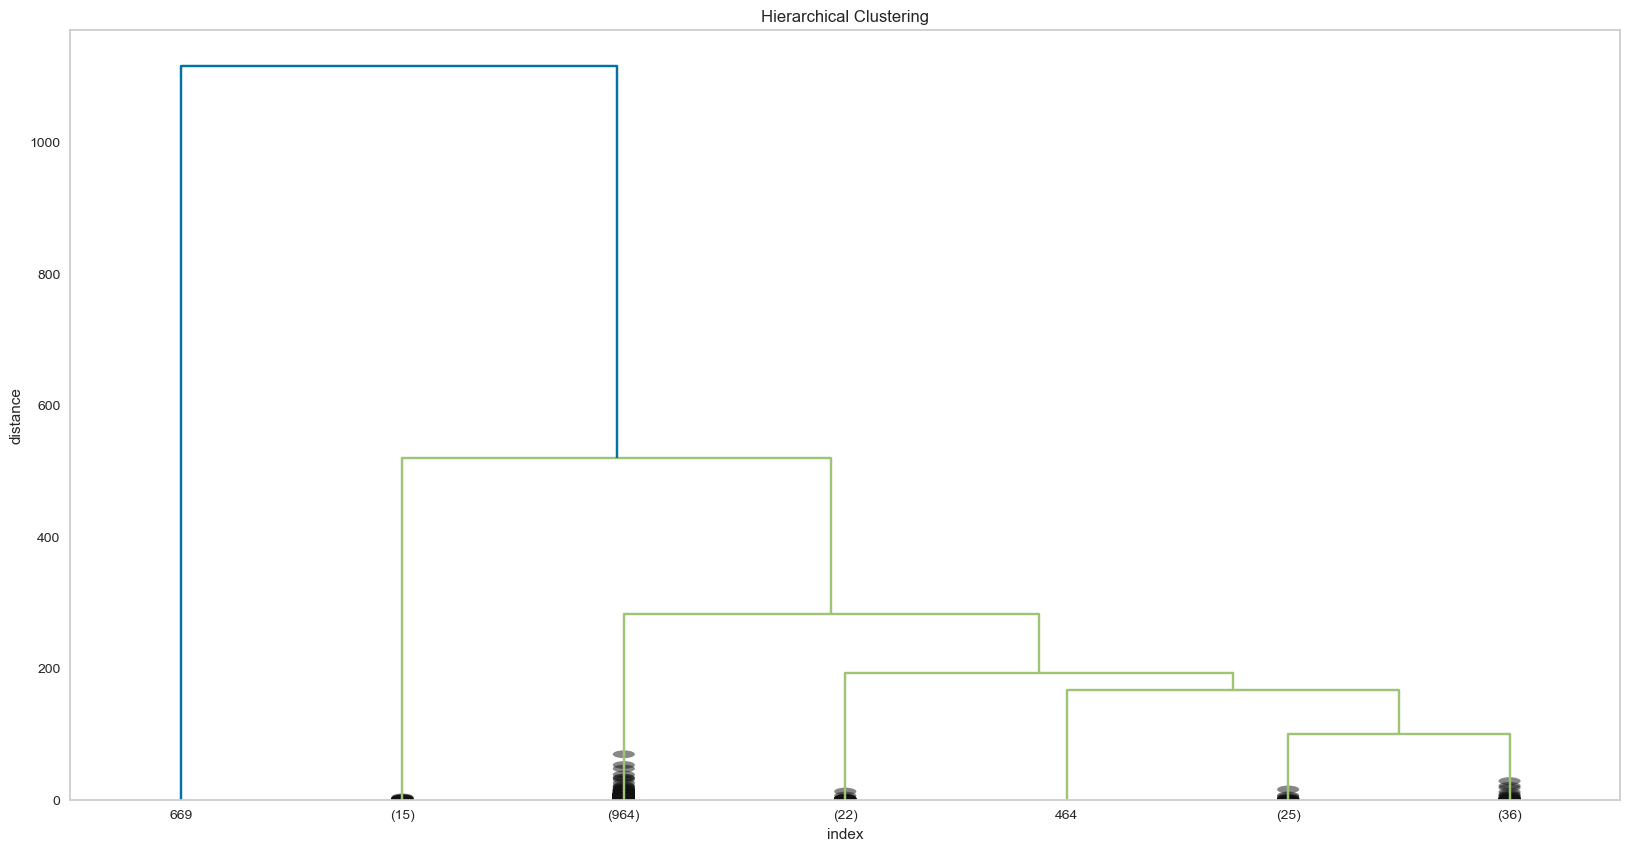

In [156]:
#complete linkage
Z = linkage(X,method='complete',metric='euclidean')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

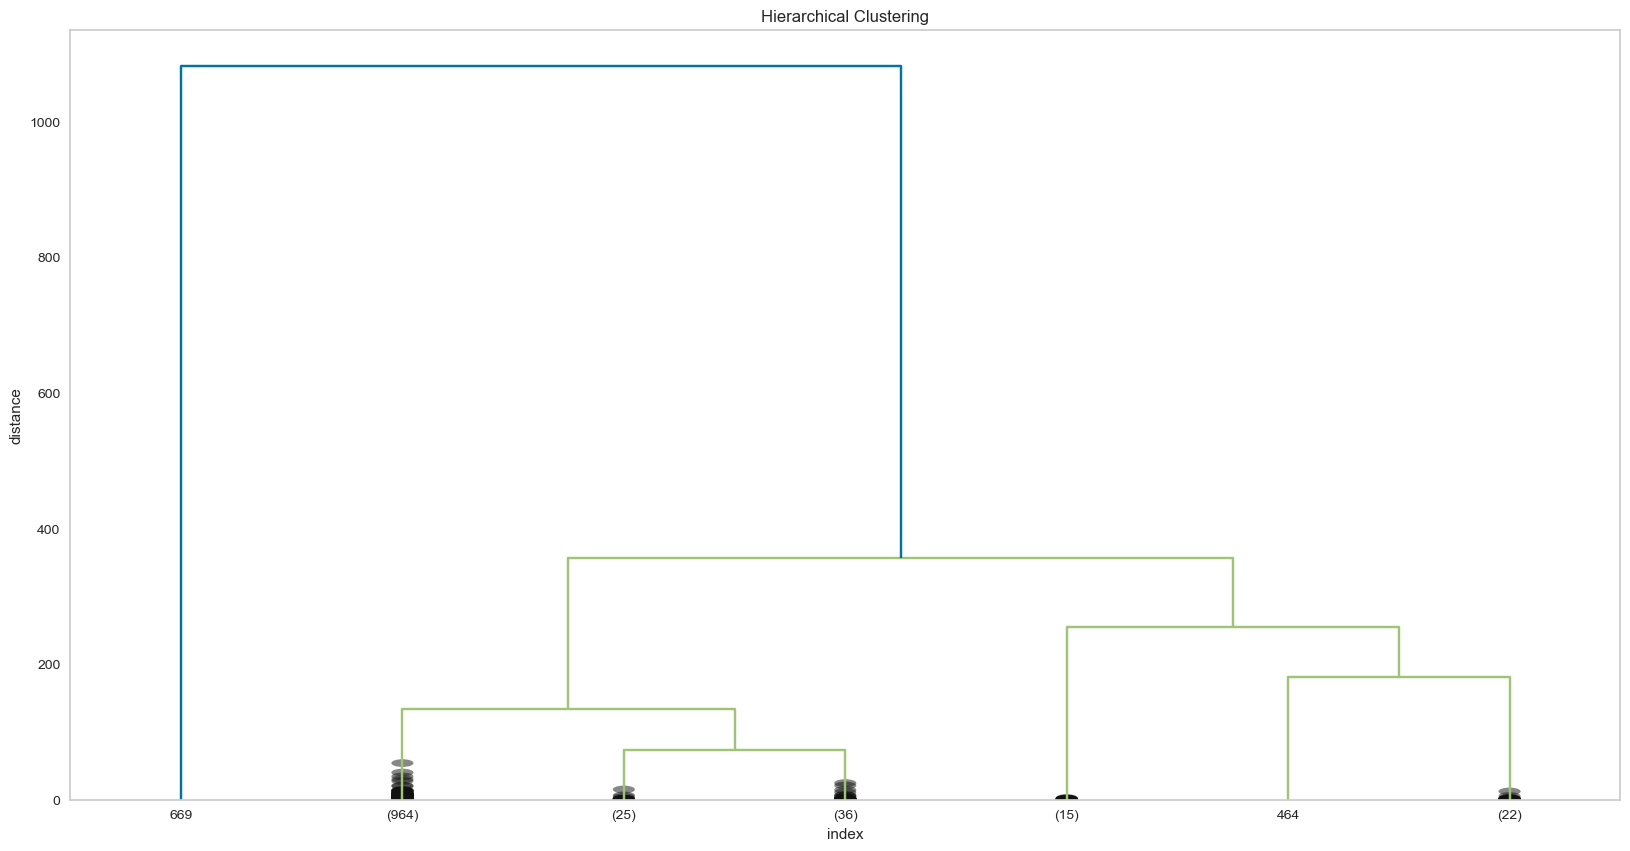

In [157]:
#avg linkage
Z = linkage(X,method='average',metric='euclidean')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

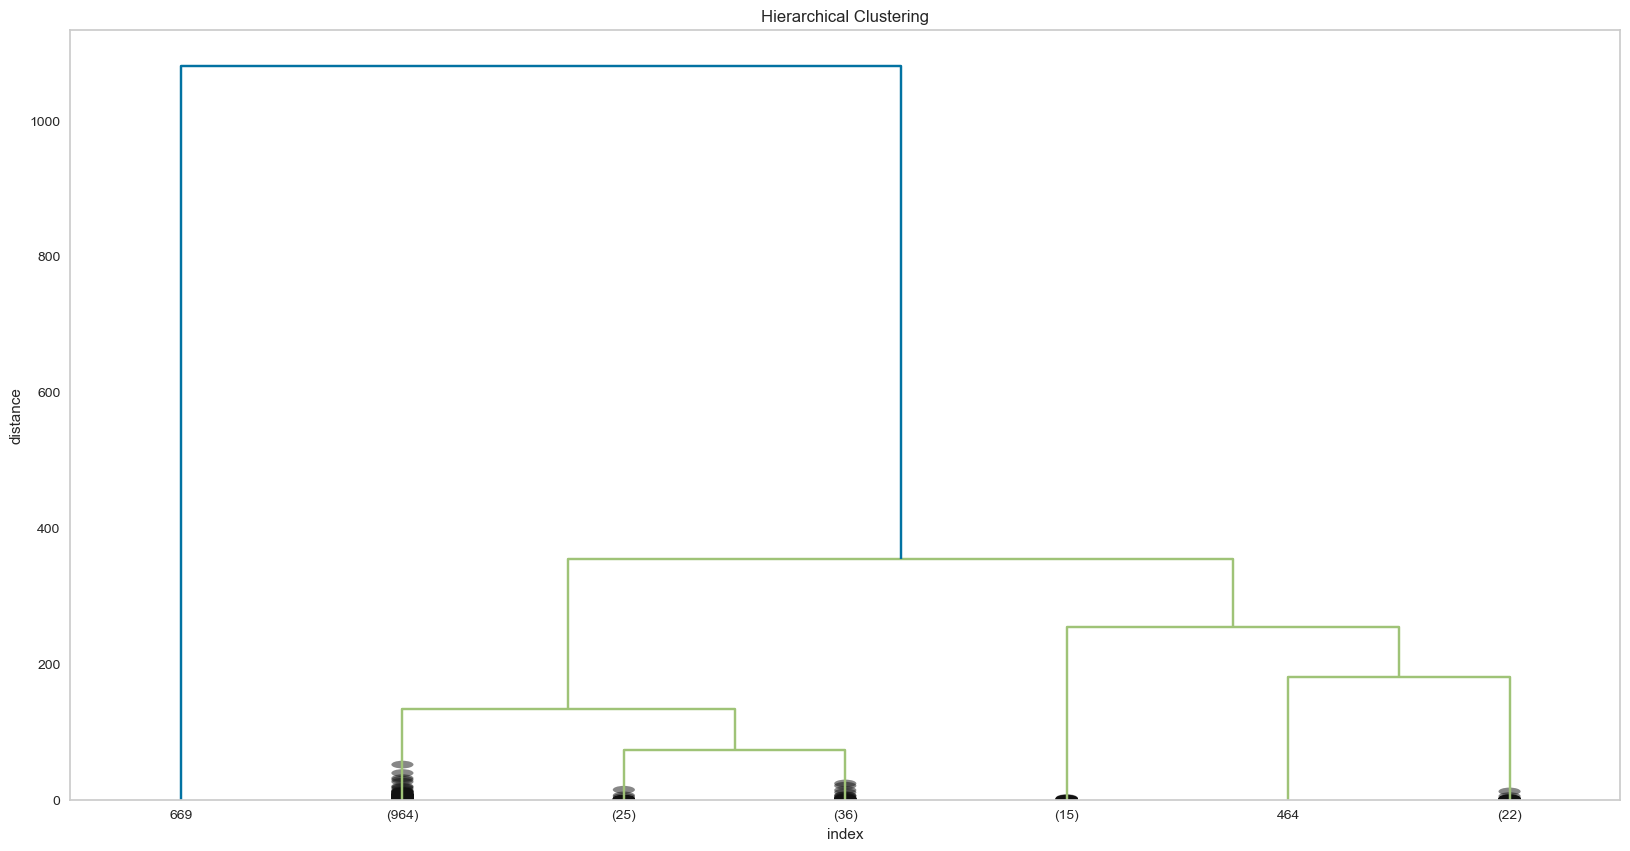

In [158]:
#centroid linkage
Z = linkage(X,method='centroid',metric='euclidean')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

Re-run the agglomerative clustering with 3 clusters. 

In [159]:
# Step 1: Initialize a model object
agg_clustering_final = AgglomerativeClustering(n_clusters=3, linkage='ward',metric='euclidean')

# Step 2: Train the model using the X_test
agg_clustering_final.fit(X)

# Step 3: Get predictions (cluster assignments)
y_pred_test_agg_clustering_final = agg_clustering_final.labels_

# Step 4: Evaluate the model performance
silhouette_score_test_agg_clustering_final = silhouette_score(X, y_pred_test_agg_clustering_final, random_state=17)

print('Silhouette score:', round(silhouette_score_test_agg_clustering_final))

Silhouette score: 1


In [160]:
# Save cluster labels into results dataframe
X_ac["hc_labels"] = y_pred_test_agg_clustering_final
X_ac.head()

Year  \
7   -0.3   
8   -0.1   
9    0.0   
10   0.1   
11   0.5   

    A woman can be head of household in the same way as a man (1=yes; 0=no)  \
7                                                 1.0                         
8                                                 1.0                         
9                                                 1.0                         
10                                                1.0                         
11                                                1.0                         

    A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
7                                                 1.0                         
8                                                 1.0                         
9                                                 1.0                         
10                                                1.0                         
11                                                1.0                         

    A woman can get a job in the same way as a man (1=yes; 0=no)  \
7                                                 1.0              
8                                                 1.0              
9                                                 1.0              
10                                                1.0              
11                                                1.0              

    A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
7                                                 0.0                                 
8                                                 0.0                                 
9                                                 0.0                                 
10                                                0.0                                 
11                                                0.0                                 

    A woman can open a bank account in the same way as a man (1=yes; 0=no)  \
7                                                 1.0                        
8                                                 1.0                        
9                                                 1.0                        
10                                                1.0                        
11                                                1.0                        

    A woman can register a business in the same way as a man (1=yes; 0=no)  \
7                                                 1.0                        
8                                                 1.0                        
9                                                 1.0                        
10                                                1.0                        
11                                                1.0                        

    A woman can sign a contract in the same way as a man (1=yes; 0=no)  \
7                                                 0.0                    
8                                                 0.0                    
9                                                 0.0                    
10                                                0.0                    
11                                                0.0                    

    A woman can travel outside her home in the same way as a man (1=yes; 0=no)  \
7                                                 0.0                            
8                                                 0.0                            
9                                                 0.0                            
10                                                0.0                            
11                                                0.0                            

    A woman can work at night in the same way as a man (1=yes; 0=no)  ...  \
7                                                 0.0                 ...   
8                  

<Axes: xlabel='Length of paid parental leave for mother (calendar days)', ylabel='GDP per capita (Current US$)'>

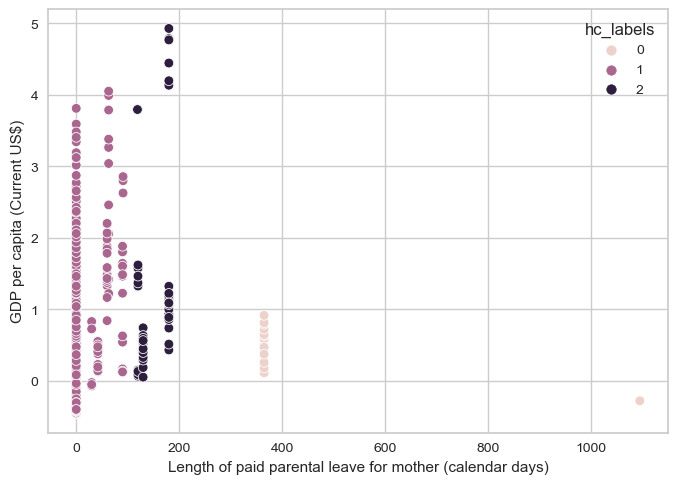

In [161]:
# Plot a few variables to see if the clustering seems to draw insight. 
sns.scatterplot(data=X_ac, y='GDP per capita (Current US$)', x='Length of paid parental leave for mother (calendar days)', hue='hc_labels')


<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

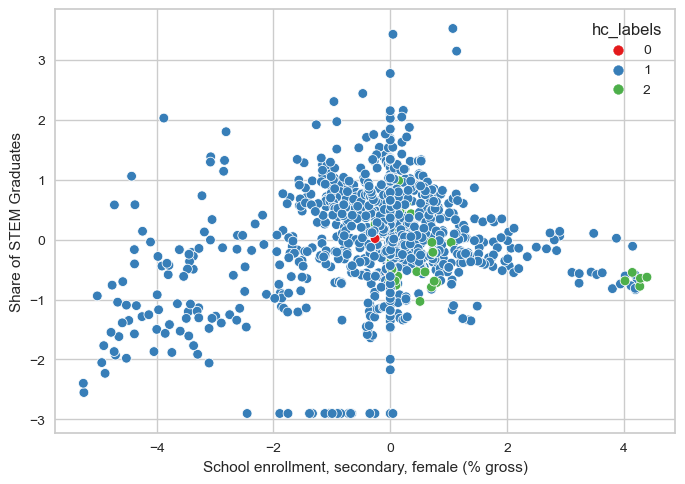

In [162]:
sns.scatterplot(data=X_ac, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates', hue='hc_labels',palette='Set1')

<Axes: xlabel='hc_labels', ylabel='Share of STEM Graduates'>

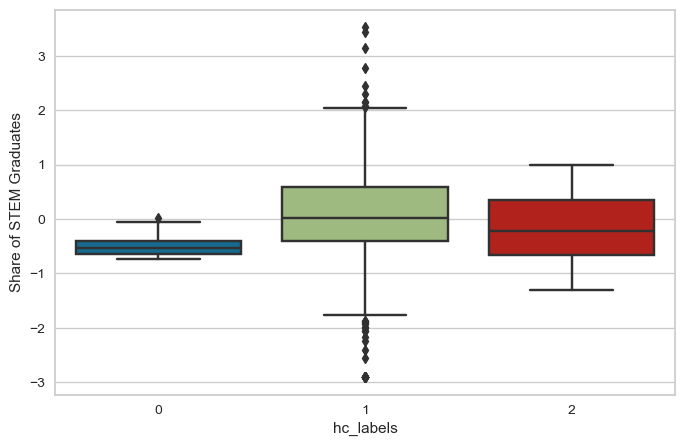

In [163]:
plt.figure(figsize=(8,5))
sns.boxplot(x='hc_labels', y='Share of STEM Graduates', data=X_ac)

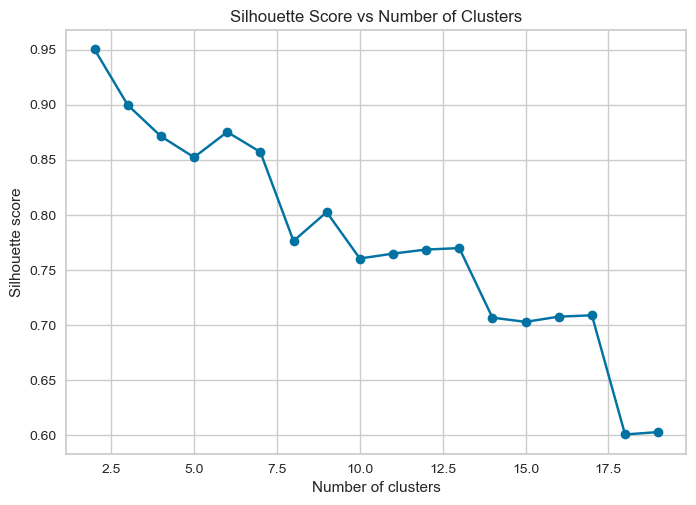

In [164]:
silhouette_scores = []
for n_clusters in range(2, 20):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,linkage='average')
    cluster_labels = agg_clustering.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels, random_state=seed)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


### Model 2: With PCA Feature Selection

In [165]:
# Step 1: Initialize a model object
agg_clustering_PCA = AgglomerativeClustering(n_clusters=3, linkage='ward',metric='euclidean')

# Step 2: Train the model using the X_test
agg_clustering_PCA.fit(X_PCA)

# Step 3: Get predictions (cluster assignments)
y_pred_test_agg_clustering_PCA = agg_clustering_PCA.labels_

# Step 4: Evaluate the model performance
silhouette_score_test_agg_clustering_final = silhouette_score(X_PCA, y_pred_test_agg_clustering_PCA, random_state=17)

# Save cluster labels into results dataframe
X_ac["hc_labels_PCA"] = y_pred_test_agg_clustering_PCA

print('Silhouette score:', round(silhouette_score_test_agg_clustering_final))

Silhouette score: 1


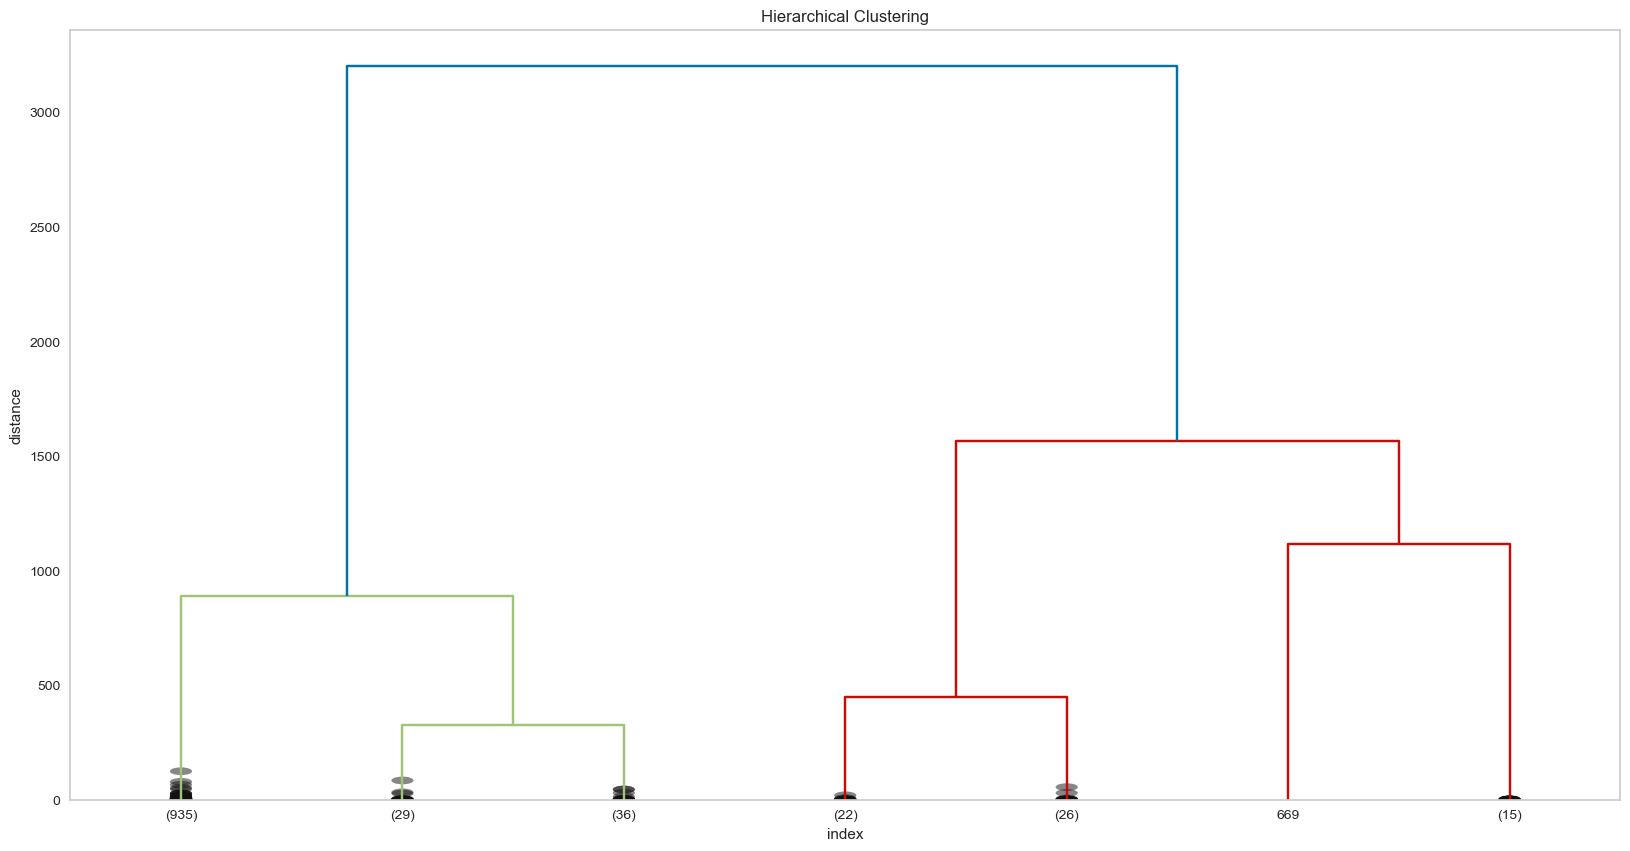

In [166]:
# Explore how many clusters to use using dendograms. Compare various linkage metrics. 

#ward linkage
Z = linkage(X_PCA,method='ward',metric='euclidean')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

<Axes: xlabel='hc_labels_PCA', ylabel='Share of STEM Graduates'>

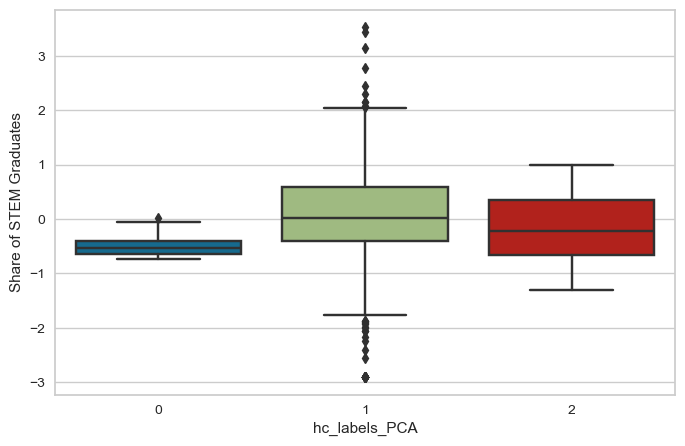

In [167]:
plt.figure(figsize=(8,5))
sns.boxplot(x='hc_labels_PCA', y='Share of STEM Graduates', data=X_ac)

### Model 3: DBSCAN

In [168]:
# Step 1: Initialize a model object
dbscan = DBSCAN(eps=40, min_samples=3)

# Step 2: Train the model
dbscan.fit(X)

# Step 3: Get predictions (cluster assignments)
y_pred_train_dbscan = dbscan.labels_

# Save to results DF

X_ac["dbscan_labels"] = y_pred_train_dbscan

# Step 4: Evaluate the model performance
silhouette_score_train_dbscan = silhouette_score(X, y_pred_train_dbscan)

print('Silhouette score:', round(silhouette_score_train_dbscan, 3))

Silhouette score: 0.845


In [169]:
# Tune parameters & fit to X_PCA data. 

# Step 1: Initialize a model object
dbscan_PCA = DBSCAN(eps=40, min_samples=3)

# Step 2: Train the model
dbscan_PCA.fit(X_PCA)

# Step 3: Get predictions (cluster assignments)
y_pred_train_dbscan_PCA = dbscan_PCA.labels_

# Save to results DF
X_ac["dbscan_pca_labels"] = y_pred_train_dbscan_PCA

# Step 4: Evaluate the model performance
silhouette_score_train_dbscan_PCA = silhouette_score(X_PCA, y_pred_train_dbscan_PCA)

print('Silhouette score:', round(silhouette_score_train_dbscan_PCA, 3))

Silhouette score: 0.887


In [170]:
# How many data points were assigned to each cluster? 
X_ac['dbscan_pca_labels'].value_counts()

dbscan_pca_labels
 0    935
 1     90
 2     22
 3     15
-1      2
Name: count, dtype: int64

<Axes: xlabel='dbscan_labels', ylabel='School enrollment, secondary, female (% gross)'>

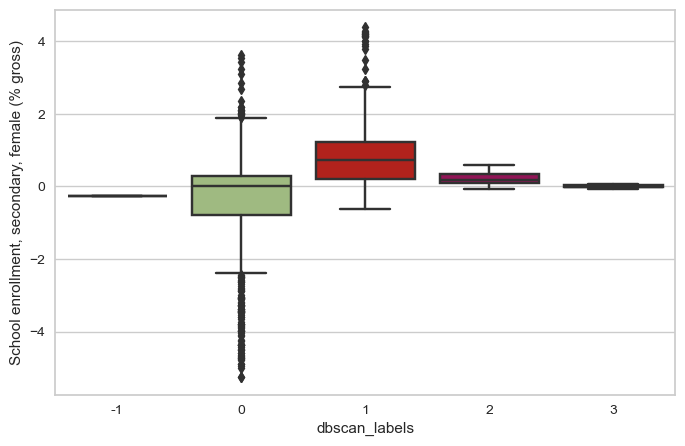

In [171]:
plt.figure(figsize=(8,5))
sns.boxplot(x='dbscan_labels', y='School enrollment, secondary, female (% gross)', data=X_ac)

<Axes: xlabel='dbscan_pca_labels', ylabel='School enrollment, secondary, female (% gross)'>

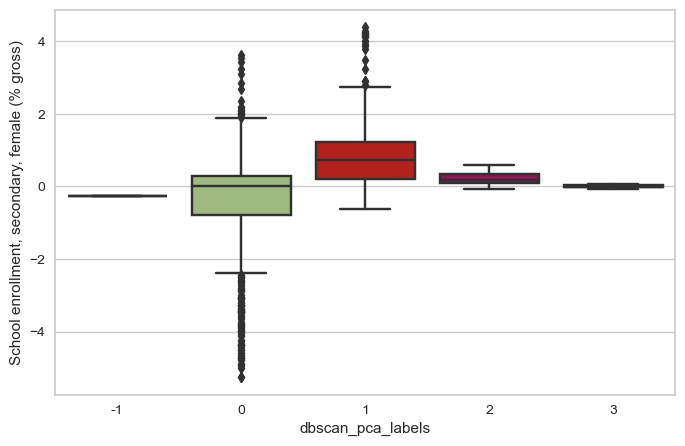

In [172]:
plt.figure(figsize=(8,5))
sns.boxplot(x='dbscan_pca_labels', y='School enrollment, secondary, female (% gross)', data=X_ac)

<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

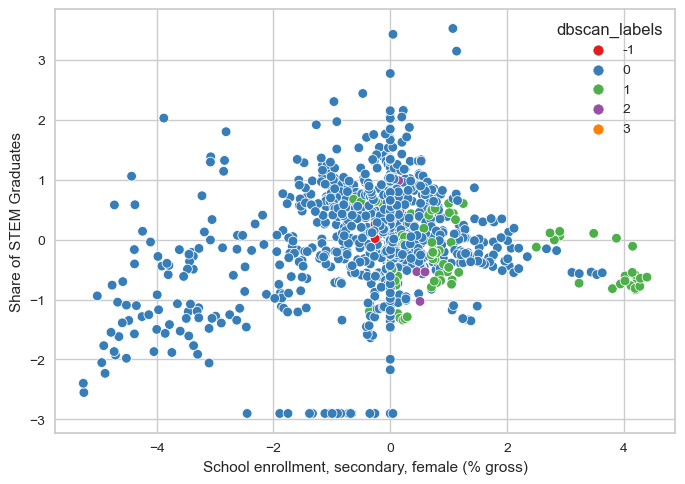

In [173]:
sns.scatterplot(data=X_ac, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates', hue='dbscan_labels',palette='Set1')

<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

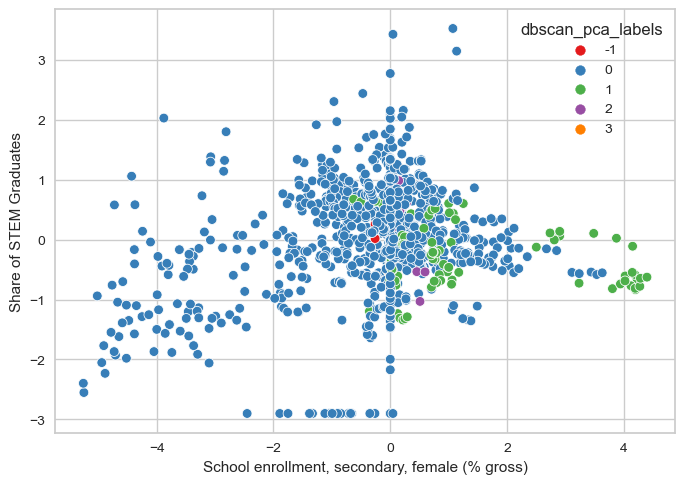

In [174]:
sns.scatterplot(data=X_ac, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates', hue='dbscan_pca_labels',palette='Set1')

The assignment for cluster=0 is still dominant for most of the data and making it difficult to get insights from the results. 

In [175]:
# # Plot the country names and cluster assignments for data points in clusters 1, 2, 3, and 4, which are smaller clusters. 

# X_withCountry['dbscan_pca_labels'] = X_ac['dbscan_pca_labels']

# plot_data = X_withCountry
# # [X_withCountry['dbscan_pca_labels'].isin([1,2,3,4])]
# unique_countries = plot_data['Country'].unique()

# plot_data = plot_data[X_withCountry['Country'].isin(unique_countries)]

# sns.scatterplot(data=plot_data, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates', hue='Country')


### Feature Engineering Part 2. Limit the dataset to only one year.

The volume of overlapping data points is making clusters difficult to interpret. Consider a single year's worth of data to see if clusters are more defined. 

In [176]:
X

Year  \
7       -0.3   
8       -0.1   
9        0.0   
10       0.1   
11       0.5   
...      ...   
143509   0.8   
144581   0.0   
144582   0.1   
144583   0.2   
144584   0.5   

        A woman can be head of household in the same way as a man (1=yes; 0=no)  \
7                                                     1.0                         
8                                                     1.0                         
9                                                     1.0                         
10                                                    1.0                         
11                                                    1.0                         
...                                                   ...                         
143509                                                1.0                         
144581                                                1.0                         
144582                                                1.0                         
144583                                                1.0                         
144584                                                1.0                         

        A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
7                                                     1.0                         
8                                                     1.0                         
9                                                     1.0                         
10                                                    1.0                         
11                                                    1.0                         
...                                                   ...                         
143509                                                0.0                         
144581                                                1.0                         
144582                                                1.0                         
144583                                                1.0                         
144584                                                1.0                         

        A woman can get a job in the same way as a man (1=yes; 0=no)  \
7                                                     1.0              
8                                                     1.0              
9                                                     1.0              
10                                                    1.0              
11                                                    1.0              
...                                                   ...              
143509                                                0.0              
144581                                                1.0              
144582                                                1.0              
144583                                                1.0              
144584                                                1.0              

        A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
7                                                     0.0                                 
8                                                     0.0                                 
9                                                     0.0                                 
10                                                    0.0                                 
11                                                    0.0                                 
...                                                   ...                                 
143509                                                0.0                                 
144581                                                0.0                                 
144582                                                0.0                                 
144583                                        

In [177]:
# 2015 = 0.5
X_noYear = X[X['Year']==0.5]
X_noYear = X_noYear.drop(columns='Year')

In [178]:
X_noYear_withCountry = X_withCountry[X_withCountry['Year']==0.5]

In [179]:
X_noYear_withCountry

Year  \
11       0.5   
1086     0.5   
4310     0.5   
5396     0.5   
6471     0.5   
...      ...   
137045   0.5   
138124   0.5   
142423   0.5   
143506   0.5   
144584   0.5   

        A woman can be head of household in the same way as a man (1=yes; 0=no)  \
11                                                    1.0                         
1086                                                  1.0                         
4310                                                  1.0                         
5396                                                  1.0                         
6471                                                  1.0                         
...                                                   ...                         
137045                                                1.0                         
138124                                                1.0                         
142423                                                1.0                         
143506                                                1.0                         
144584                                                1.0                         

        A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
11                                                    1.0                         
1086                                                  1.0                         
4310                                                  1.0                         
5396                                                  1.0                         
6471                                                  1.0                         
...                                                   ...                         
137045                                                1.0                         
138124                                                1.0                         
142423                                                1.0                         
143506                                                0.0                         
144584                                                1.0                         

        A woman can get a job in the same way as a man (1=yes; 0=no)  \
11                                                    1.0              
1086                                                  1.0              
4310                                                  1.0              
5396                                                  1.0              
6471                                                  1.0              
...                                                   ...              
137045                                                1.0              
138124                                                1.0              
142423                                                1.0              
143506                                                0.0              
144584                                                1.0              

        A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
11                                                    0.0                                 
1086                                                  1.0                                 
4310                                                  1.0                                 
5396                                                  1.0                                 
6471                                                  1.0                                 
...                                                   ...                                 
137045                                                1.0                                 
138124                                                1.0                                 
142423                                                1.0                                 
143506                                        

In [180]:
X_noYear.shape

(87, 52)

### Model 1: KMeans With Single Year Data

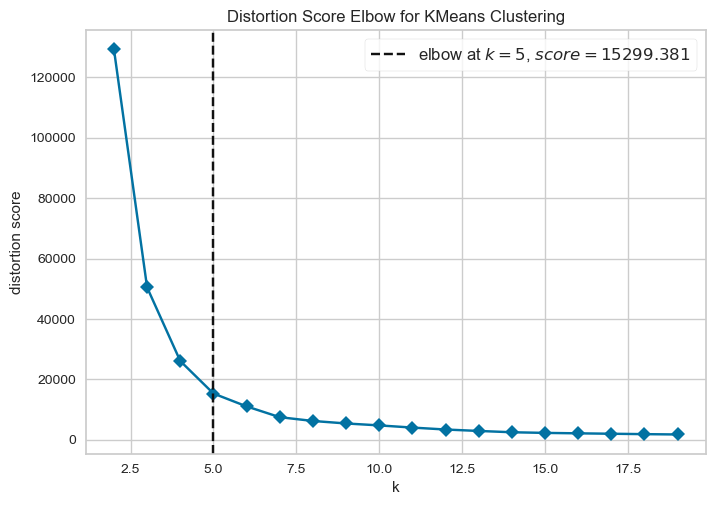

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [181]:
#Create a Kmeans model and plot the number of Ks between 2 and 12
seed = 17

model = KMeans(random_state=seed, n_init=10)

visualizer = KElbowVisualizer(model, k=(2,20), timings=False)
visualizer.fit(X_noYear)
visualizer.show()

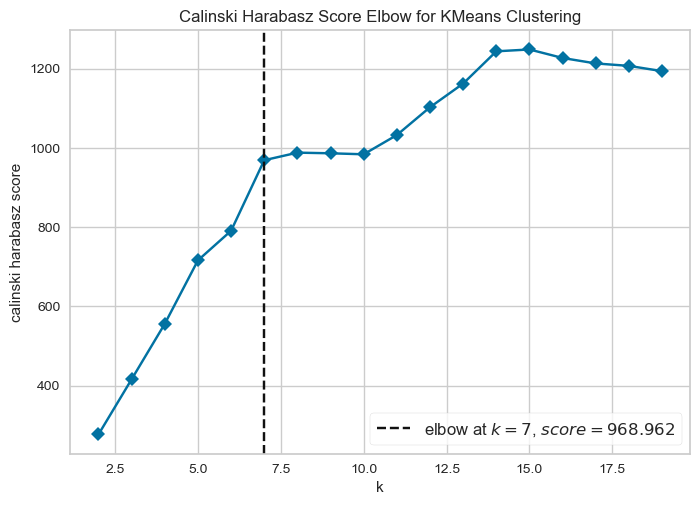

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [182]:
#Create a Kmeans model and plot the number of Ks between 2 and 12 using calinski_harabasz score

model = KMeans(random_state=seed, n_init=10)
visualizer = KElbowVisualizer(model, k=(2,20), timings=False, metric='calinski_harabasz', locate_elbow=True)
visualizer.fit(X_noYear)
visualizer.show()

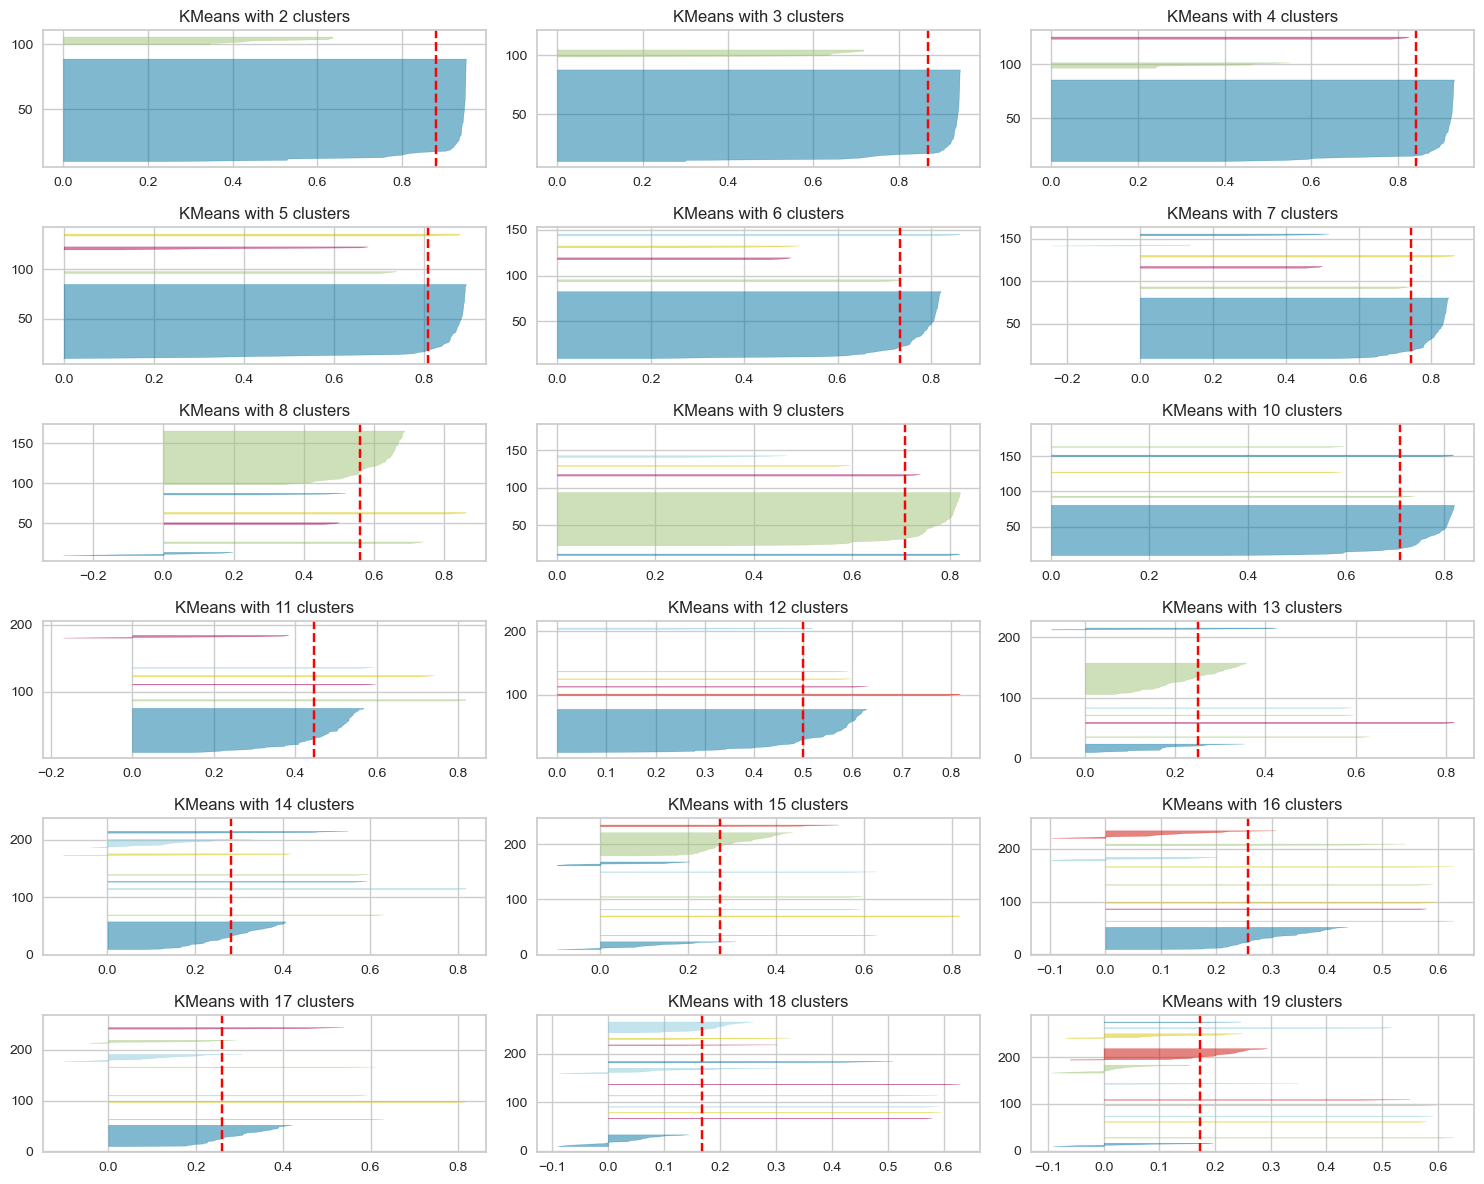

In [183]:
# Create a subplot grid
fig, ax = plt.subplots(6, 3, figsize=(15, 12))
j = 0
h = 0

for i in range(2, 20):

    # Initialize the KMeans model
    model = KMeans(random_state=seed, n_clusters=i, n_init = 10)

    # Create a SilhouetteVisualizer for the current model
    viz = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[h][j])

    # Fit the visualizer
    viz.fit(X_noYear)

    # Set the title for each subplot
    ax[h][j].set_title(f'KMeans with {i} clusters')

    # Update the subplot position
    if j < 2:
        j += 1
    else:
        j = 0
        h += 1

# Show the plot
plt.tight_layout()
plt.show()

In [184]:
# K Means Model with 3 Clusters
kmeans_noYear = KMeans(random_state=seed, n_clusters=4, n_init = 10)

# Step 2: Train the model using the X_test
kmeans_noYear.fit(X_noYear)

# Step 3: Get predictions (cluster assignments)
y_pred_test_kmeans_noYear = kmeans_noYear.labels_

# Step 4: Evaluate the model performance
silhouette_score_test_kmeans_final = silhouette_score(X_noYear, y_pred_test_kmeans_noYear)

print('Silhouette score:', round(silhouette_score_test_kmeans_final, 3))

Silhouette score: 0.841


In [185]:
X_noYear_ac = X_noYear.copy()
X_noYear_ac["kmeans_noYear_labels"] = y_pred_test_kmeans_noYear
X_noYear_ac.head()

A woman can be head of household in the same way as a man (1=yes; 0=no)  \
11                                                  1.0                         
1086                                                1.0                         
4310                                                1.0                         
5396                                                1.0                         
6471                                                1.0                         

      A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
11                                                  1.0                         
1086                                                1.0                         
4310                                                1.0                         
5396                                                1.0                         
6471                                                1.0                         

      A woman can get a job in the same way as a man (1=yes; 0=no)  \
11                                                  1.0              
1086                                                1.0              
4310                                                1.0              
5396                                                1.0              
6471                                                1.0              

      A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
11                                                  0.0                                 
1086                                                1.0                                 
4310                                                1.0                                 
5396                                                1.0                                 
6471                                                1.0                                 

      A woman can open a bank account in the same way as a man (1=yes; 0=no)  \
11                                                  1.0                        
1086                                                1.0                        
4310                                                1.0                        
5396                                                1.0                        
6471                                                1.0                        

      A woman can register a business in the same way as a man (1=yes; 0=no)  \
11                                                  1.0                        
1086                                                1.0                        
4310                                                1.0                        
5396                                                1.0                        
6471                                                1.0                        

      A woman can sign a contract in the same way as a man (1=yes; 0=no)  \
11                                                  0.0                    
1086                                                1.0                    
4310                                                0.0                    
5396                                                1.0                    
6471                                                1.0                    

      A woman can travel outside her home in the same way as a man (1=yes; 0=no)  \
11                                                  0.0                            
1086                                                1.0                            
4310                                                1.0                            
5396                                                1.0                            
6471                                                1.0                            

      A woman can work at night in the same way as a man (1=yes; 0=no)  \
11                                                  0.0                  
1086

<Axes: xlabel='kmeans_noYear_labels', ylabel='Share of STEM Graduates'>

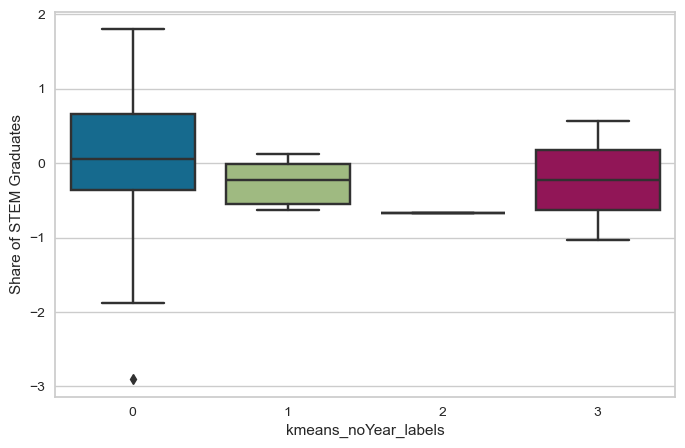

In [186]:
plt.figure(figsize=(8,5))
sns.boxplot(x='kmeans_noYear_labels', y='Share of STEM Graduates', data=X_noYear_ac)

<Axes: xlabel='Age dependency ratio (% of working-age population)', ylabel='Share of STEM Graduates'>

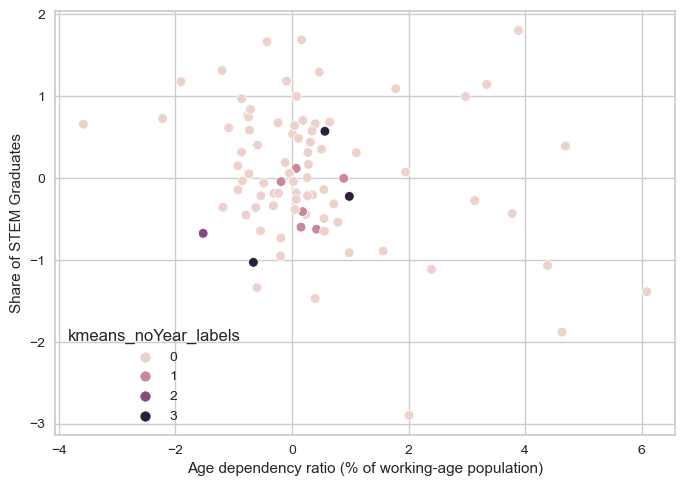

In [187]:
sns.scatterplot(data=X_noYear_ac, x='Age dependency ratio (% of working-age population)', y='Share of STEM Graduates', hue='kmeans_noYear_labels')

<Axes: xlabel='kmeans_noYear_labels', ylabel='School enrollment, secondary, female (% gross)'>

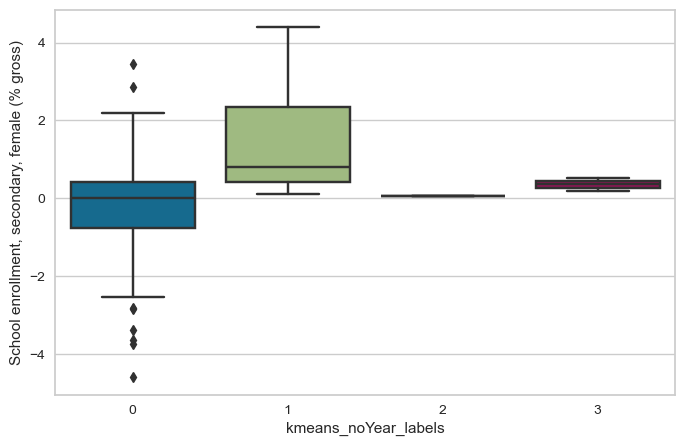

In [188]:
plt.figure(figsize=(8,5))
sns.boxplot(x='kmeans_noYear_labels', y='School enrollment, secondary, female (% gross)', data=X_noYear_ac)

### Model 2: Agglomerative Clustering Using Single Year Data

In [189]:
# Step 1: Initialize a model object
agg_clustering = AgglomerativeClustering()

# Step 2: Train the model
agg_clustering.fit(X_noYear)

# Step 3: Get predictions (cluster assignments)
y_pred_train_agg_clustering = agg_clustering.labels_

# Step 4: Evaluate the model performance
silhouette_score_train_agg = silhouette_score(X_noYear, y_pred_train_agg_clustering)

print('Silhouette score:', round(silhouette_score_train_agg, 3))
print('Number of Clusters (default model):', round(agg_clustering.n_clusters_, 3))

Silhouette score: 0.88
Number of Clusters (default model): 2


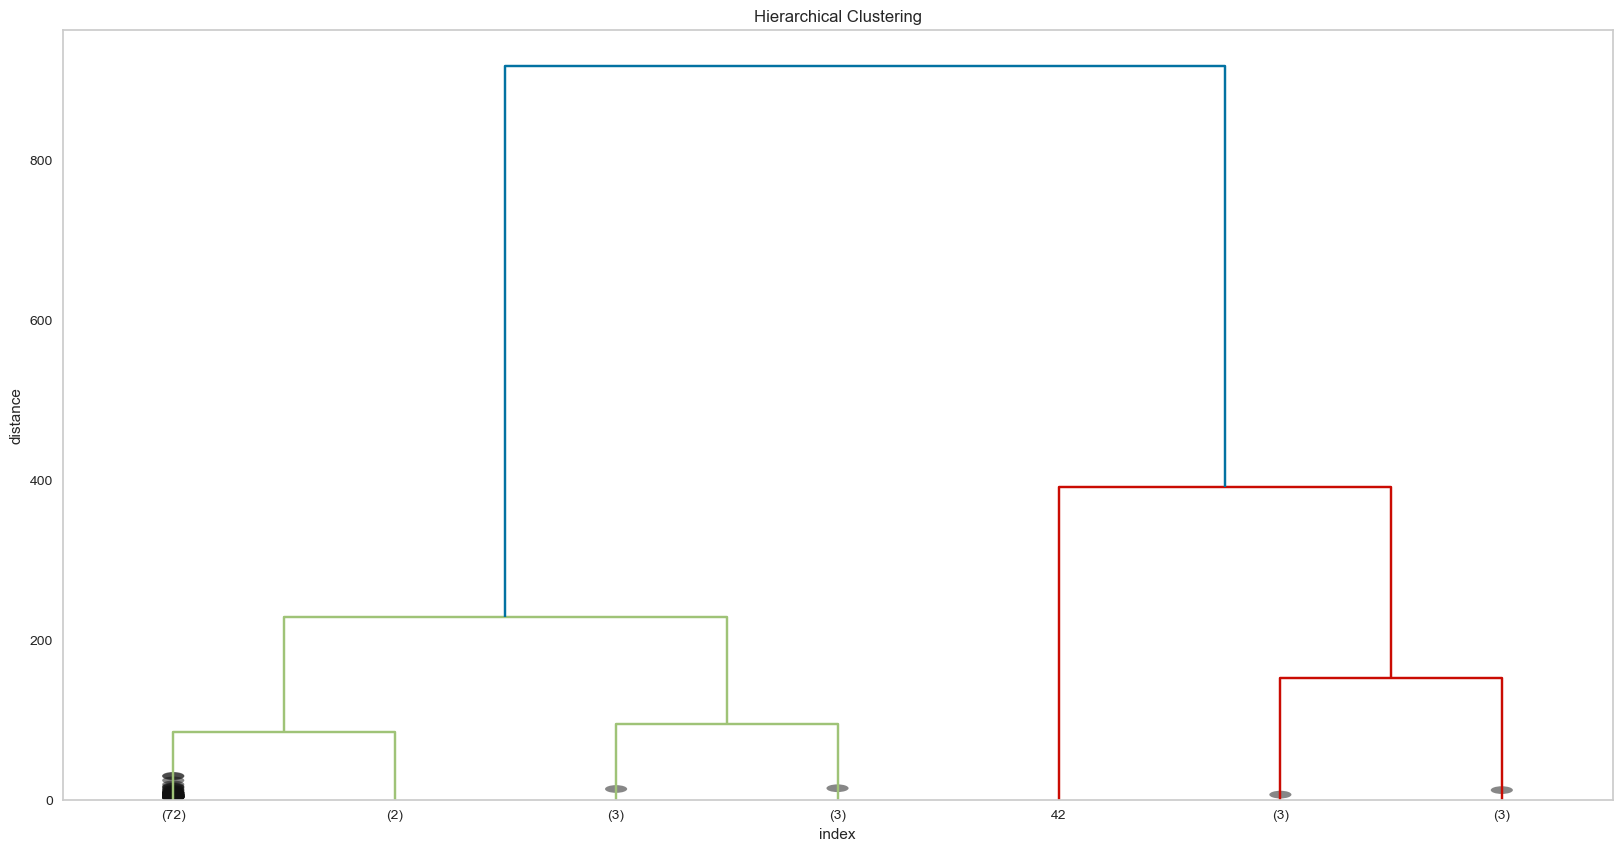

In [190]:
# Explore how many clusters to use using dendograms. Compare various linkage metrics. 

#ward linkage
Z = linkage(X_noYear,method='ward',metric='euclidean')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

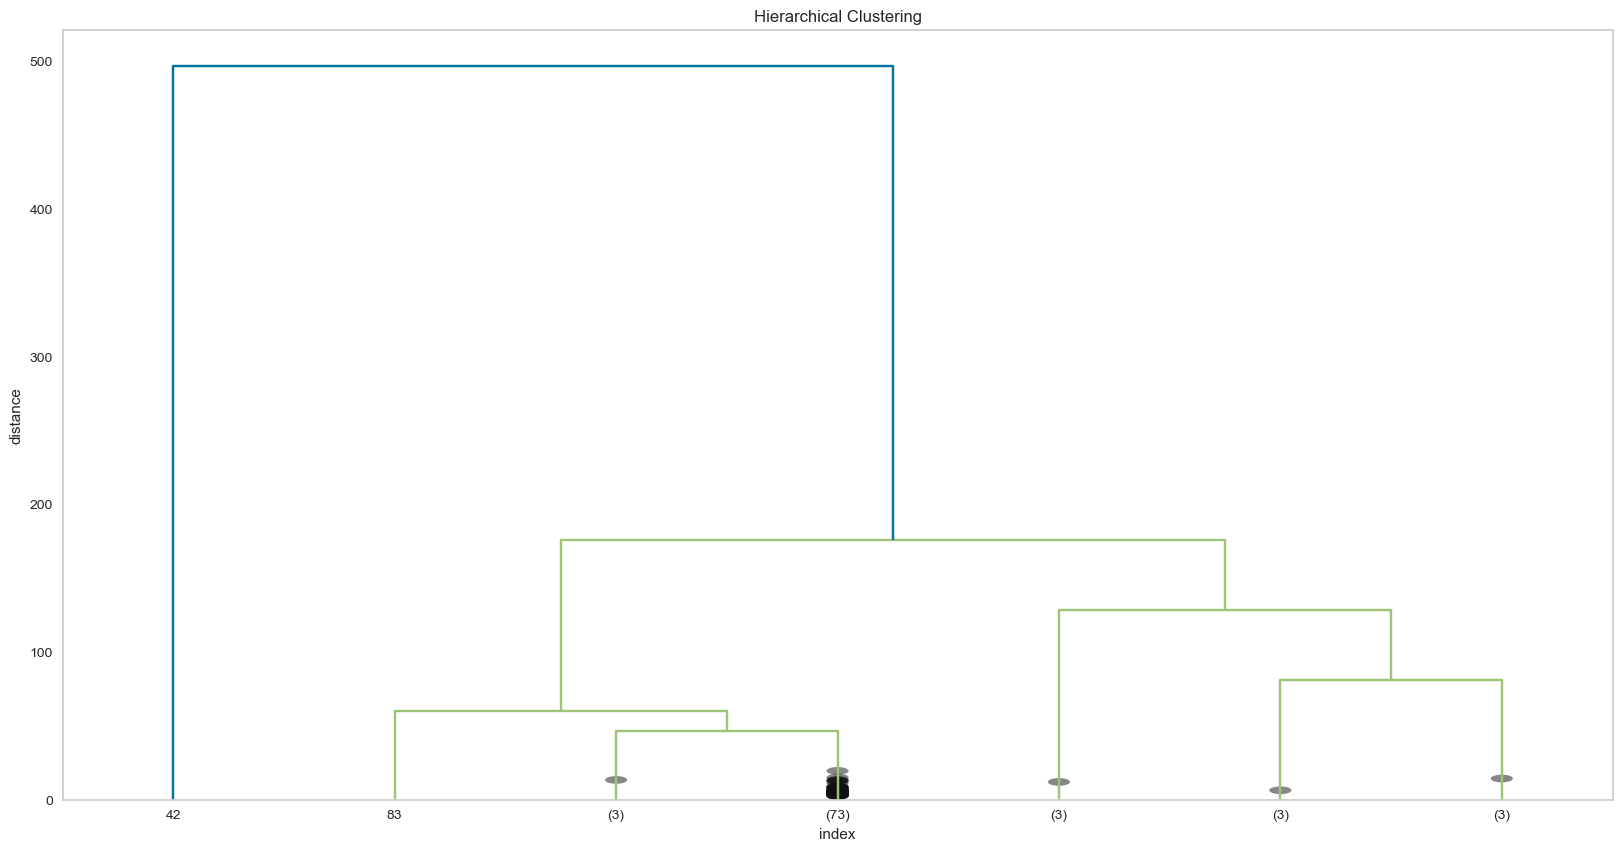

In [191]:
# Explore how many clusters to use using dendograms. Compare various linkage metrics. 

#ward linkage
Z = linkage(X_noYear,method='average',metric='euclidean')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

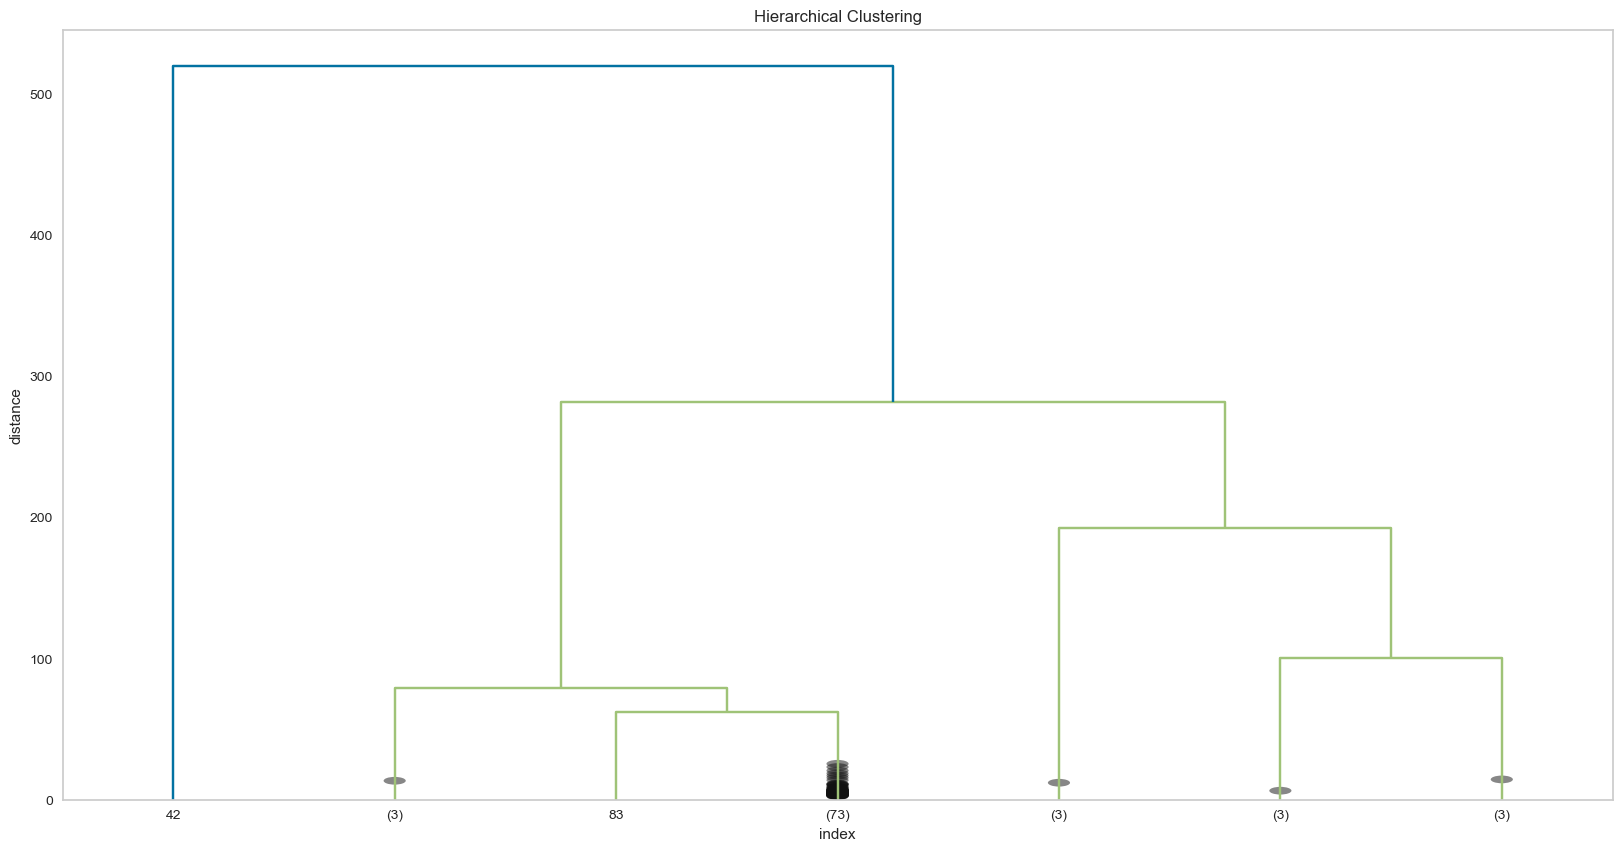

In [192]:
# Explore how many clusters to use using dendograms. Compare various linkage metrics. 

#ward linkage
Z = linkage(X_noYear,method='complete',metric='euclidean')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

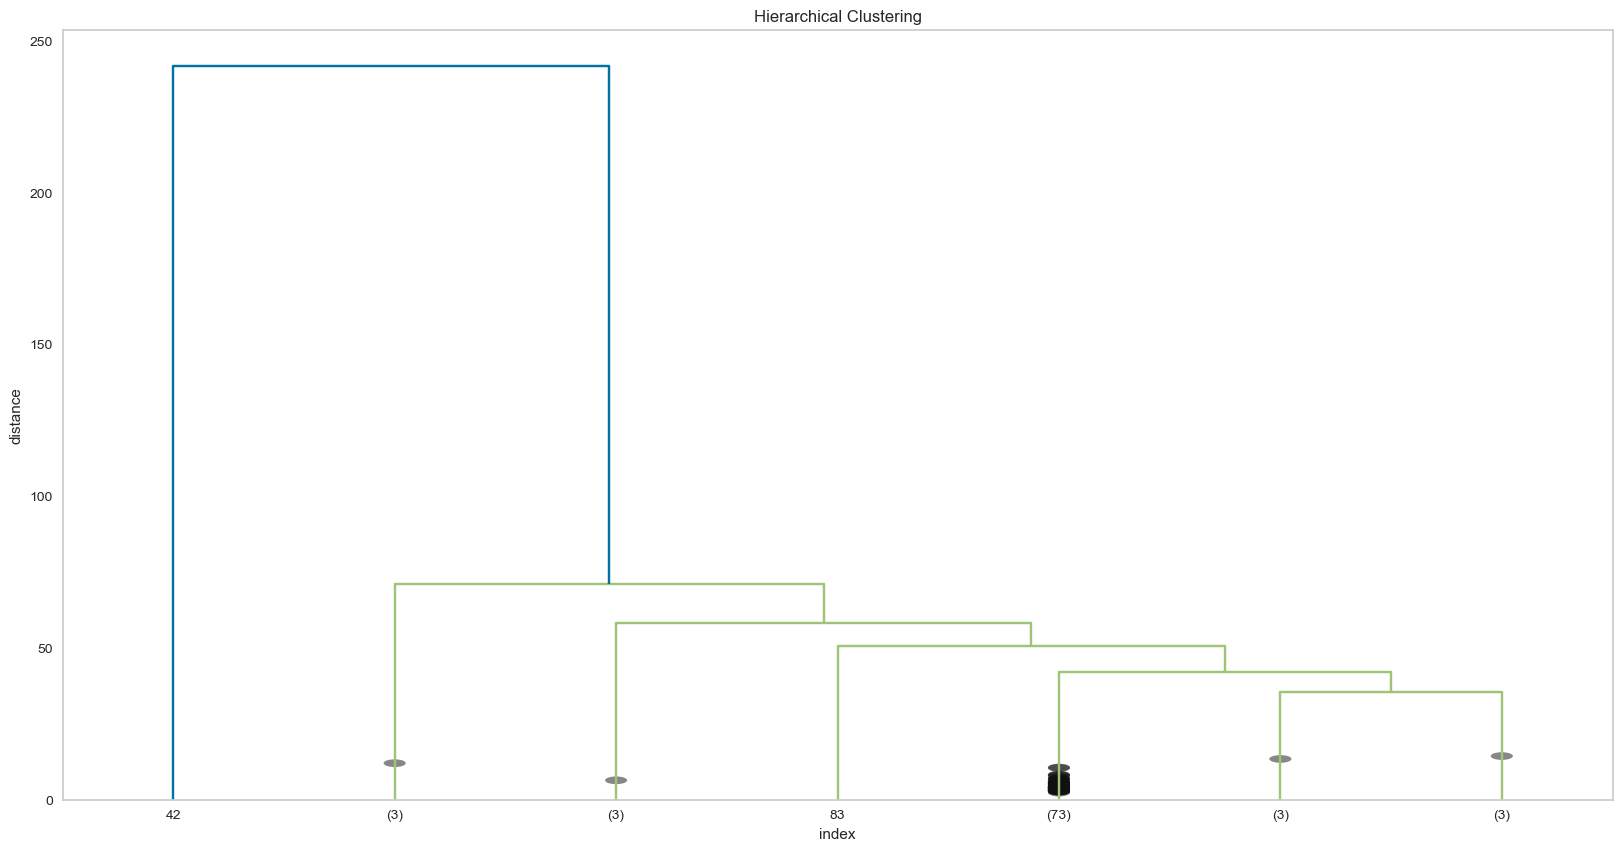

In [193]:
# Explore how many clusters to use using dendograms. Compare various linkage metrics. 

#ward linkage
Z = linkage(X_noYear,method='single',metric='euclidean')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

In [194]:
# Step 1: Initialize a model object
agg_clustering_noYear = AgglomerativeClustering(n_clusters=3, linkage='average',metric='euclidean')

# Step 2: Train the model using the X_test
agg_clustering_noYear.fit(X_noYear)

# Step 3: Get predictions (cluster assignments)
y_pred_test_agg_clustering_noYear = agg_clustering_noYear.labels_

# Step 4: Evaluate the model performance
silhouette_score_test_agg_clustering_noYear = silhouette_score(X_noYear, y_pred_test_agg_clustering_noYear, random_state=17)

print('Silhouette score:', round(silhouette_score_test_agg_clustering_noYear))

Silhouette score: 1


In [195]:
# Save cluster labels into results dataframe
X_noYear_ac["hc_noYear_labels"] = y_pred_test_agg_clustering_noYear
X_noYear_ac.head()

A woman can be head of household in the same way as a man (1=yes; 0=no)  \
11                                                  1.0                         
1086                                                1.0                         
4310                                                1.0                         
5396                                                1.0                         
6471                                                1.0                         

      A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
11                                                  1.0                         
1086                                                1.0                         
4310                                                1.0                         
5396                                                1.0                         
6471                                                1.0                         

      A woman can get a job in the same way as a man (1=yes; 0=no)  \
11                                                  1.0              
1086                                                1.0              
4310                                                1.0              
5396                                                1.0              
6471                                                1.0              

      A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
11                                                  0.0                                 
1086                                                1.0                                 
4310                                                1.0                                 
5396                                                1.0                                 
6471                                                1.0                                 

      A woman can open a bank account in the same way as a man (1=yes; 0=no)  \
11                                                  1.0                        
1086                                                1.0                        
4310                                                1.0                        
5396                                                1.0                        
6471                                                1.0                        

      A woman can register a business in the same way as a man (1=yes; 0=no)  \
11                                                  1.0                        
1086                                                1.0                        
4310                                                1.0                        
5396                                                1.0                        
6471                                                1.0                        

      A woman can sign a contract in the same way as a man (1=yes; 0=no)  \
11                                                  0.0                    
1086                                                1.0                    
4310                                                0.0                    
5396                                                1.0                    
6471                                                1.0                    

      A woman can travel outside her home in the same way as a man (1=yes; 0=no)  \
11                                                  0.0                            
1086                                                1.0                            
4310                                                1.0                            
5396                                                1.0                            
6471                                                1.0                            

      A woman can work at night in the same way as a man (1=yes; 0=no)  \
11                                                  0.0                  
1086

<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

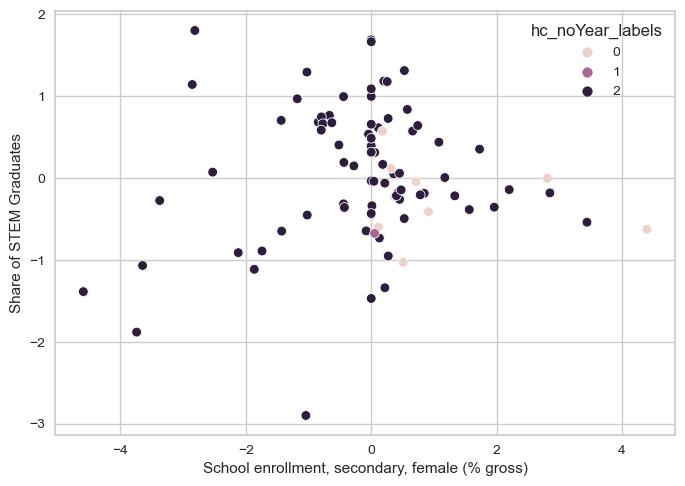

In [196]:
sns.scatterplot(data=X_noYear_ac, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates', hue='hc_noYear_labels')

<Axes: xlabel='hc_noYear_labels', ylabel='School enrollment, secondary, female (% gross)'>

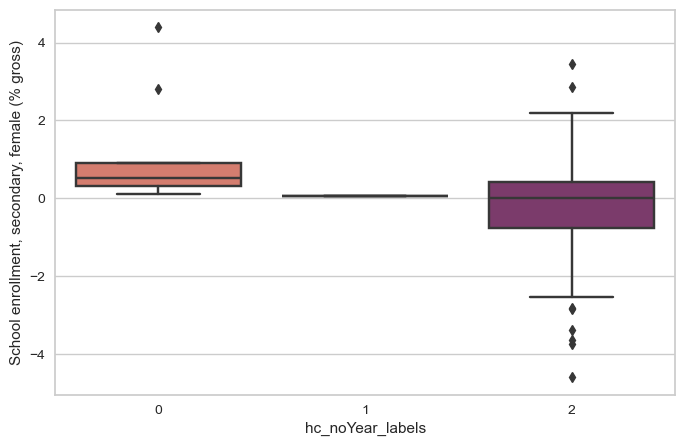

In [197]:
plt.figure(figsize=(8,5))
sns.boxplot(x='hc_noYear_labels', y='School enrollment, secondary, female (% gross)', data=X_noYear_ac,palette='flare')

### Model 3: DBSCAN Using Single Year Data

In [198]:

# Step 1: Initialize a model object
dbscan = DBSCAN(eps=13, min_samples=2)

# Step 2: Train the model
dbscan.fit(X_noYear)

# Step 3: Get predictions (cluster assignments)
y_pred_train_dbscan = dbscan.labels_

# Save to results DF
X_noYear_ac["dbscan_labels_noYear"] = y_pred_train_dbscan

# Step 4: Evaluate the model performance
silhouette_score_train_dbscan = silhouette_score(X_noYear, y_pred_train_dbscan)

print('Silhouette score:', round(silhouette_score_train_dbscan, 3))

Silhouette score: 0.74


<Axes: xlabel='A woman can get a job in the same way as a man (1=yes; 0=no)', ylabel='School enrollment, secondary, female (% gross)'>

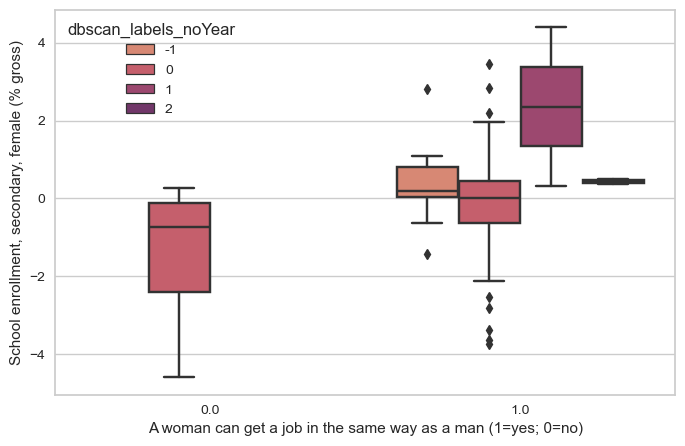

In [199]:
plt.figure(figsize=(8,5))
sns.boxplot(x='A woman can get a job in the same way as a man (1=yes; 0=no)', hue='dbscan_labels_noYear', y='School enrollment, secondary, female (% gross)', data=X_noYear_ac, palette='flare')

<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

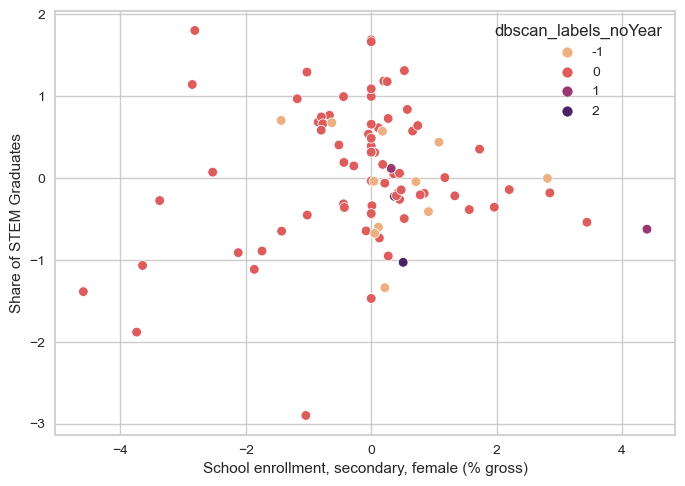

In [200]:
sns.scatterplot(data=X_noYear_ac, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates', hue='dbscan_labels_noYear',palette='flare')

# Fertility rate, total (births per woman)

<Axes: xlabel='The government administers 100% of maternity leave benefits (1=yes; 0=no)', ylabel='Share of STEM Graduates'>

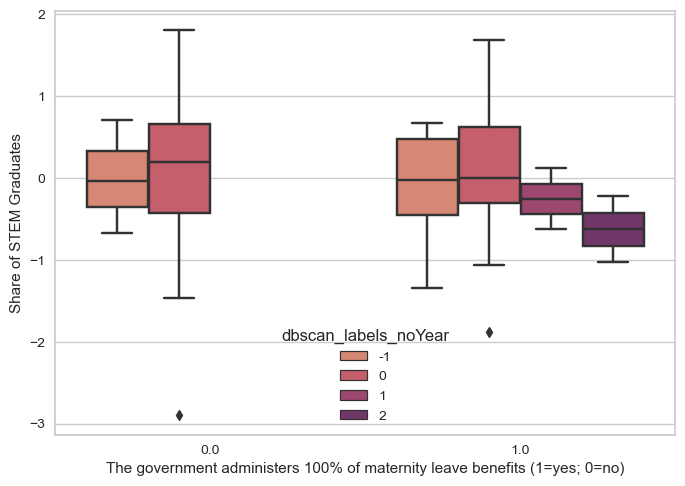

In [201]:
sns.boxplot(data=X_noYear_ac, y='Share of STEM Graduates', x='The government administers 100% of maternity leave benefits (1=yes; 0=no)', hue='dbscan_labels_noYear',palette='flare')

<Axes: xlabel='dbscan_labels_noYear', ylabel='Share of STEM Graduates'>

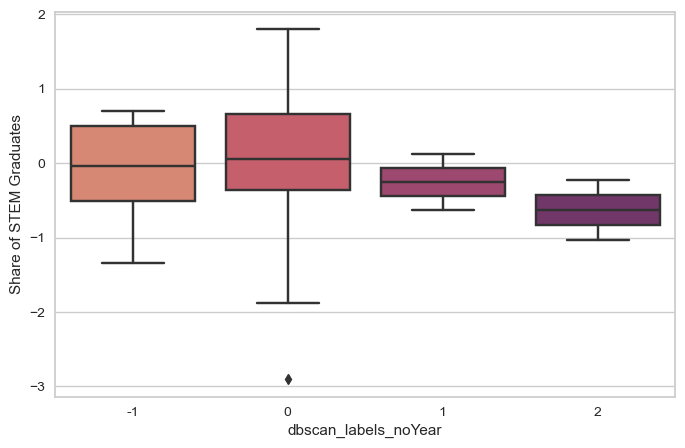

In [202]:
plt.figure(figsize=(8,5))
sns.boxplot(x='dbscan_labels_noYear', y='Share of STEM Graduates', data=X_noYear_ac, palette='flare')

<Axes: xlabel='dbscan_labels_noYear', ylabel='Length of paid maternity leave (calendar days)'>

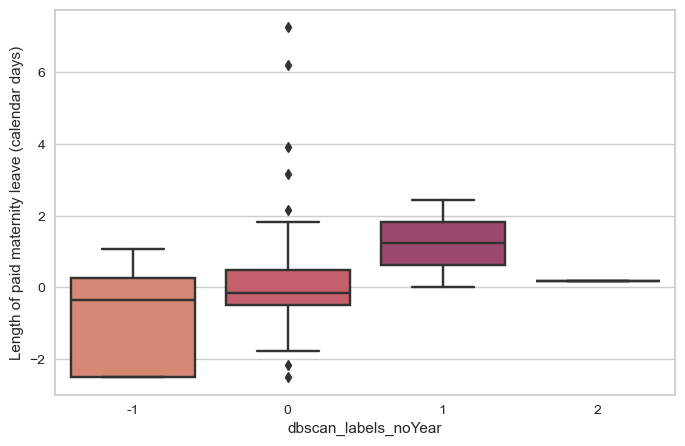

In [203]:
plt.figure(figsize=(8,5))
sns.boxplot(y='Length of paid maternity leave (calendar days)' ,x='dbscan_labels_noYear', data=X_noYear_ac,palette='flare')

# hue='Length of paid paternity leave (calendar days)',

<Axes: xlabel='dbscan_labels_noYear', ylabel='Adolescent fertility rate (births per 1,000 women ages 15-19)'>

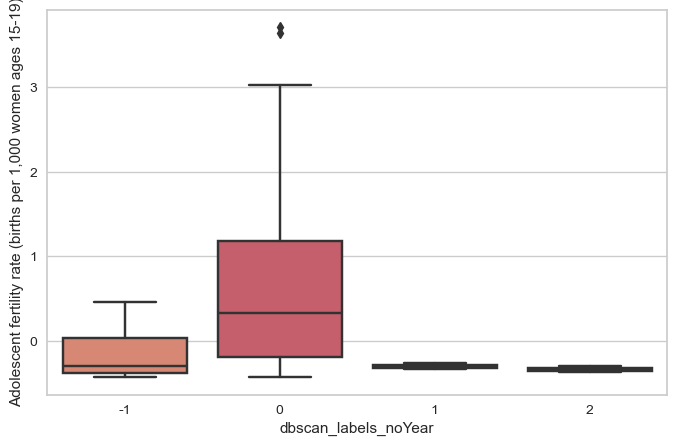

In [204]:
plt.figure(figsize=(8,5))
sns.boxplot(x='dbscan_labels_noYear', y='Adolescent fertility rate (births per 1,000 women ages 15-19)', data=X_noYear_ac,palette='flare')

<Axes: xlabel='Length of paid parental leave for mother (calendar days)', ylabel='GDP per capita (Current US$)'>

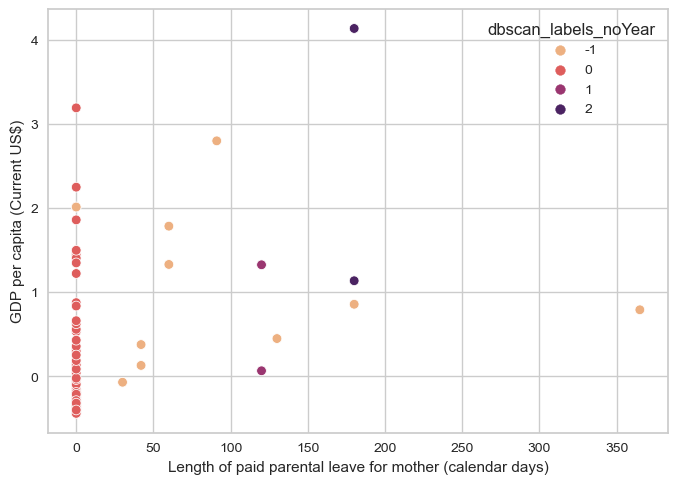

In [205]:
# sns.scatterplot(data=X_noYear_ac, x='Adolescent fertility rate (births per 1,000 women ages 15-19)', y='School enrollment, secondary, female (% gross)', hue='dbscan_labels_noYear',palette='Set1')

sns.scatterplot(data=X_noYear_ac, y='GDP per capita (Current US$)', x='Length of paid parental leave for mother (calendar days)', hue='dbscan_labels_noYear',palette='flare')


#### New PCA Dataset from Single Year Data

In [206]:
# Step 1: Initialize a model object
pca = PCA(random_state=seed)

# Step 2: Train the model
pca_data = pca.fit(X_noYear)

# Step 3: Get explained_variance_ratio_
pca_data.explained_variance_ratio_

array([9.80583144e-01, 8.39807914e-03, 2.96156036e-03, 2.14591556e-03,
       1.18382227e-03, 1.06423707e-03, 9.21478661e-04, 4.79704693e-04,
       4.32817880e-04, 3.68338996e-04, 2.85751308e-04, 2.32436326e-04,
       1.24487668e-04, 1.17824244e-04, 1.02185614e-04, 7.66720239e-05,
       6.44639133e-05, 5.38167693e-05, 4.83088335e-05, 3.55581564e-05,
       3.52106194e-05, 3.01638307e-05, 2.90233777e-05, 2.43075197e-05,
       2.15069752e-05, 1.88990847e-05, 1.80360061e-05, 1.50941674e-05,
       1.39243947e-05, 1.29566893e-05, 1.27886559e-05, 1.19877582e-05,
       9.14300737e-06, 8.79102246e-06, 8.18816946e-06, 7.36703557e-06,
       6.93642665e-06, 6.10940789e-06, 5.11410286e-06, 4.61191500e-06,
       4.05354347e-06, 3.60470069e-06, 2.92616735e-06, 2.16872201e-06,
       2.05801316e-06, 1.50767806e-06, 1.28006746e-06, 8.51947723e-07,
       3.71543636e-07, 3.18606889e-07, 9.55981423e-08, 9.22773970e-33])

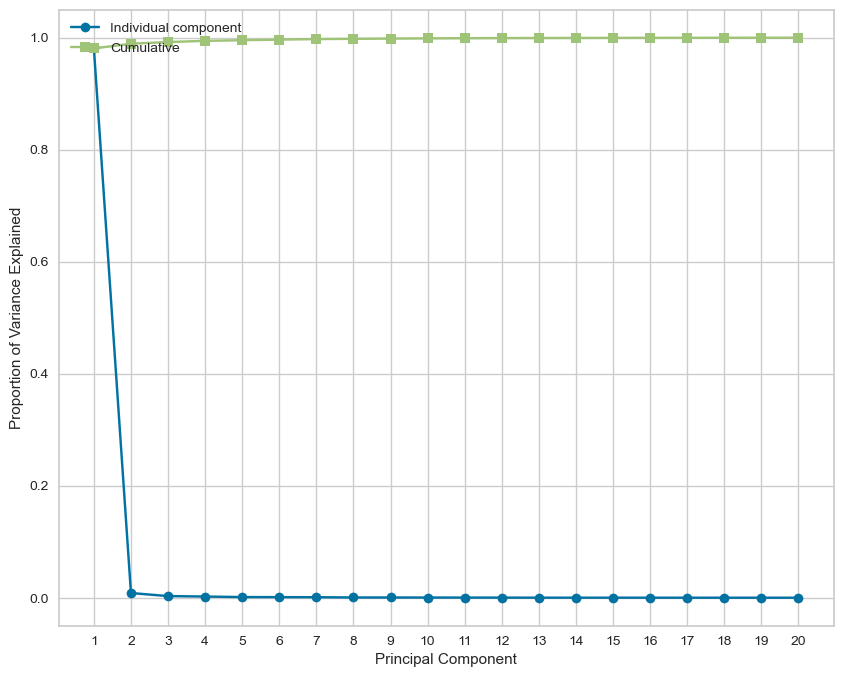

In [207]:
# Plot the variance explained ratios from the PCA to see how many components are needed to explain all of the features. 

pcidx = np.arange(1, 21)

plt.figure(figsize=(10, 8))

plt.plot(pcidx, pca_data.explained_variance_ratio_[:20], '-o', label='Individual component')
plt.plot(pcidx, np.cumsum(pca_data.explained_variance_ratio_[:20]), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xticks(pcidx)
plt.legend(loc=2)

In [208]:
# The plot appears to flatten after 5 components. Create a new dataframe that is a PCA subset with n_components=5

n_components = 5
pca = PCA(n_components=n_components, random_state=seed)
X_PCA_noYear = pd.DataFrame(pca.fit_transform(X_noYear), columns=['PC1', 'PC2', 'PC3', 'PC4','PC5'], index=X_noYear.index)
X_PCA_noYear

PC1        PC2       PC3        PC4       PC5
11     -25.668427  -1.546969 -0.590846  -0.552764  0.235995
1086   -25.712656  -2.353252 -0.916182  -1.147864  5.326143
4310   -25.661918  -2.431722 -0.583942  -0.644189 -0.022625
5396   -25.568095   2.763848  0.036409   0.125022 -4.289050
6471   -25.622813  -0.829631 -0.240136  -0.662978 -1.767470
...           ...        ...       ...        ...       ...
137045 -25.513826   9.529885 -0.371252   2.044184 -3.641667
138124 -25.175354  55.509748  7.057559 -16.407867  1.087556
142423 -25.646380   0.342124 -1.063998   1.344779  0.020057
143506 -25.692581  -2.526093 -0.619171  -1.305757  2.486205
144584 -25.684395  -2.425621 -0.754850  -1.100836  3.429036

[87 rows x 5 columns]

#### DBSCAN Using Single Year Data & PCA 

In [209]:
# Tune parameters & fit to X_PCA data. eps=12, min_samples=10

# Step 1: Initialize a model object
dbscan_PCA_noYear = DBSCAN(eps=13, min_samples=2)

# Step 2: Train the model
dbscan_PCA_noYear.fit(X_PCA_noYear)

# Step 3: Get predictions (cluster assignments)
y_pred_train_dbscan = dbscan_PCA_noYear.labels_

# Save to results DF
X_noYear_ac["dbscan_pca_labels_noYear_PCA"] = y_pred_train_dbscan

# Step 4: Evaluate the model performance
silhouette_score_train_dbscan = silhouette_score(X_PCA_noYear, y_pred_train_dbscan)

print('Silhouette score:', round(silhouette_score_train_dbscan, 3))

Silhouette score: 0.755


<Axes: xlabel='dbscan_pca_labels_noYear_PCA', ylabel='Share of STEM Graduates'>

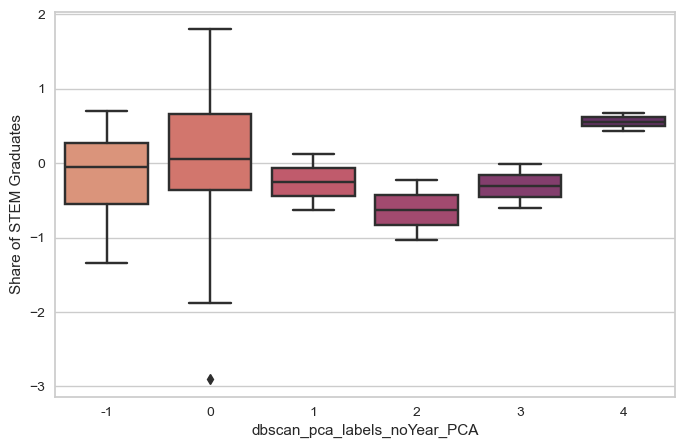

In [210]:
plt.figure(figsize=(8,5))
sns.boxplot(x='dbscan_pca_labels_noYear_PCA', y='Share of STEM Graduates', data=X_noYear_ac,palette='flare')

<Axes: xlabel='Length of paid parental leave for mother (calendar days)', ylabel='GDP per capita (Current US$)'>

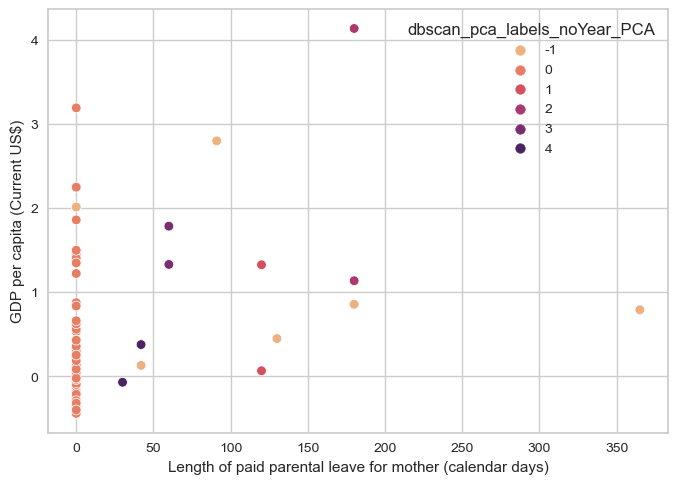

In [211]:
sns.scatterplot(data=X_noYear_ac, y='GDP per capita (Current US$)', x='Length of paid parental leave for mother (calendar days)', hue='dbscan_pca_labels_noYear_PCA',palette='flare')


<Axes: xlabel='The government administers 100% of maternity leave benefits (1=yes; 0=no)', ylabel='Length of paid maternity leave (calendar days)'>

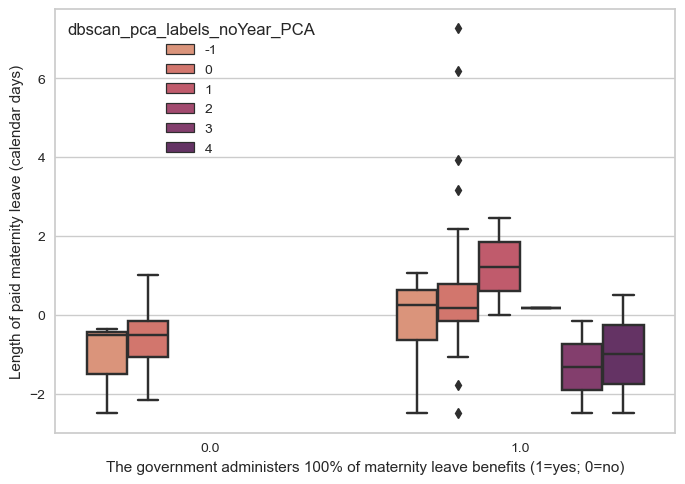

In [212]:
sns.boxplot(data=X_noYear_ac, y='Length of paid maternity leave (calendar days)', x='The government administers 100% of maternity leave benefits (1=yes; 0=no)', hue='dbscan_pca_labels_noYear_PCA',palette='flare')

<Axes: xlabel='Share of STEM Graduates', ylabel='School enrollment, secondary, female (% gross)'>

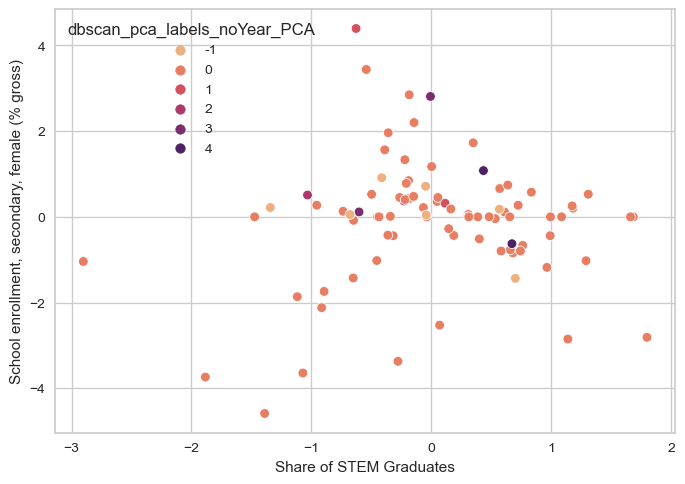

In [213]:
sns.scatterplot(data=X_noYear_ac, x='Share of STEM Graduates', y='School enrollment, secondary, female (% gross)', hue='dbscan_pca_labels_noYear_PCA',palette='flare')

### Model 3: Finetune PCA, Single Year Data

In [214]:
# Defining the list of hyperparameters to try
eps_list=np.arange(start=2, stop=150, step=1)
min_sample_list=np.arange(start=2, stop=100, step=1)

# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data = []
silhouette_scores = []

for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
        if(len(np.unique(db.fit_predict(X_PCA_noYear)))>3):
            sil_score=silhouette_score(X_PCA_noYear, db.fit_predict(X_PCA_noYear))
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)
        
        silhouette_scores.append(sil_score)
        silhouette_scores_data.append(trial_parameters)

# Finding out the best hyperparameters with highest Score
df = pd.DataFrame()
df['score'] = silhouette_scores
df['paramaters'] = silhouette_scores_data
df = df.sort_values(by='score',ascending=False)

In [215]:
df.head(-25)

score            paramaters
76  0.866803  eps:57 min_sample :3
69  0.866803  eps:54 min_sample :2
63  0.866803  eps:51 min_sample :2
64  0.866803  eps:51 min_sample :3
65  0.866803  eps:52 min_sample :2
67  0.866803  eps:53 min_sample :2
68  0.866803  eps:53 min_sample :3
66  0.866803  eps:52 min_sample :3
70  0.866803  eps:54 min_sample :3
71  0.866803  eps:55 min_sample :2
72  0.866803  eps:55 min_sample :3
73  0.866803  eps:56 min_sample :2
74  0.866803  eps:56 min_sample :3
75  0.866803  eps:57 min_sample :2
53  0.846320  eps:46 min_sample :2
45  0.846320  eps:42 min_sample :2
46  0.846320  eps:42 min_sample :3
47  0.846320  eps:43 min_sample :2
48  0.846320  eps:43 min_sample :3
49  0.846320  eps:44 min_sample :2
50  0.846320  eps:44 min_sample :3
51  0.846320  eps:45 min_sample :2
52  0.846320  eps:45 min_sample :3
58  0.846320  eps:48 min_sample :3
54  0.846320  eps:46 min_sample :3
55  0.846320  eps:47 min_sample :2
56  0.846320  eps:47 min_sample :3
57  0.846320  eps:48 min_sample :2
59  0.846320  eps:49 min_sample :2
60  0.846320  eps:49 min_sample :3
61  0.846320  eps:50 min_sample :2
62  0.846320  eps:50 min_sample :3
39  0.825776  eps:39 min_sample :2
44  0.825776  eps:41 min_sample :3
43  0.825776  eps:41 min_sample :2
42  0.825776  eps:40 min_sample :3
41  0.825776  eps:40 min_sample :2
40  0.825776  eps:39 min_sample :3
38  0.825776  eps:38 min_sample :3
36  0.825776  eps:37 min_sample :3
35  0.825776  eps:37 min_sample :2
34  0.825776  eps:36 min_sample :3
33  0.825776  eps:36 min_sample :2
37  0.825776  eps:38 min_sample :2
29  0.806045  eps:34 min_sample :2
32  0.806045  eps:35 min_sample :3
31  0.806045  eps:35 min_sample :2
30  0.806045  eps:34 min_sample :3
28  0.806045  eps:33 min_sample :3
27  0.806045  eps:33 min_sample :2
23  0.796331  eps:31 min_sample :2
25  0.796331  eps:32 min_sample :2

In [216]:
 # Tune parameters & fit to X_PCA data. eps=12, min_samples=10

# Step 1: Initialize a model object
dbscan_PCA_noYear = DBSCAN(eps=36, min_samples=3)

# Step 2: Train the model
dbscan_PCA_noYear.fit(X_PCA_noYear)

# Step 3: Get predictions (cluster assignments)
y_pred_train_dbscan = dbscan_PCA_noYear.labels_

# Save to results DF
X_noYear_ac["dbscan_pca_labels_noYear_PCA"] = y_pred_train_dbscan

# Step 4: Evaluate the model performance
silhouette_score_train_dbscan = silhouette_score(X_PCA_noYear, y_pred_train_dbscan)

print('Silhouette score:', round(silhouette_score_train_dbscan, 3))

Silhouette score: 0.826


<Axes: xlabel='dbscan_pca_labels_noYear_PCA', ylabel='Share of STEM Graduates'>

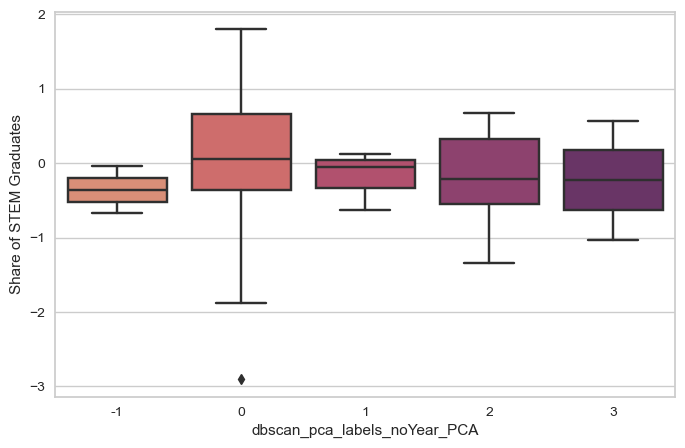

In [217]:
plt.figure(figsize=(8,5))
sns.boxplot(x='dbscan_pca_labels_noYear_PCA', y='Share of STEM Graduates', data=X_noYear_ac,palette='flare')

<Axes: xlabel='Length of paid parental leave for mother (calendar days)', ylabel='GDP per capita (Current US$)'>

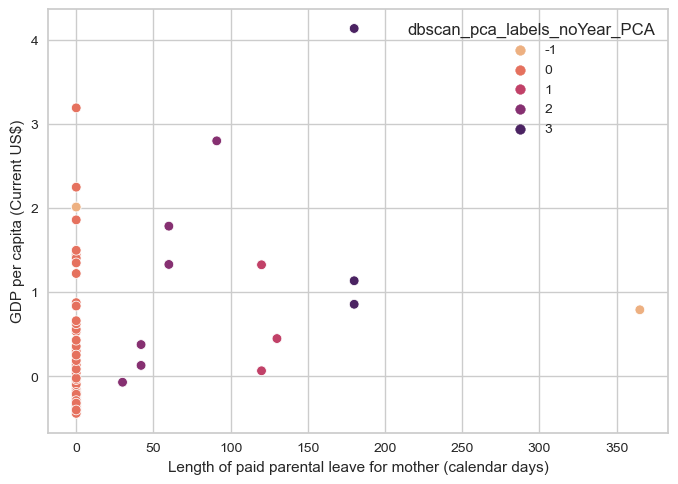

In [218]:
sns.scatterplot(data=X_noYear_ac, y='GDP per capita (Current US$)', x='Length of paid parental leave for mother (calendar days)', hue='dbscan_pca_labels_noYear_PCA',palette='flare')


#### Hypertune DBSCAN

In [219]:
def GridSearch(parameters, data):
    best_score = -np.inf
    best_params = {'eps': None, 'min_samples': None}

    for eps in parameters['eps']:
        for min_samples in parameters['min_samples']:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
            labels = dbscan.labels_
            num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            num_noise = list(labels).count(-1)
            if len(set(labels)) > 2 and np.count_nonzero(labels != -1) > 0:
                            score = silhouette_score(data, labels)
                            if score > best_score:
                                best_score = score
                                best_params['eps'] = eps
                                best_params['min_samples'] = min_samples


    return best_params

In [220]:
eps_list=np.arange(start=2, stop=150, step=1)
min_sample_list=np.arange(start=2, stop=100, step=1)

parameters = {'eps': eps_list, 
              'min_samples': min_sample_list,
              }

GridSearch(parameters,X_PCA_noYear)

{'eps': 51, 'min_samples': 2}

In [221]:
# Step 1: Initialize a model object

params = GridSearch(parameters,X_PCA_noYear)
min_samples = params['min_samples']
eps = params['eps']

dbscan_PCA_noYear = DBSCAN(min_samples=min_samples,eps=eps)

# Step 2: Train the model
dbscan_PCA_noYear.fit(X_PCA_noYear)

# Step 3: Get predictions (cluster assignments)
y_pred_train_dbscan = dbscan_PCA_noYear.labels_

# Save to results DF
X_noYear_ac["dbscan_labels_noYear_PCA_hypertuned"] = y_pred_train_dbscan

# Step 4: Evaluate the model performance
silhouette_score_train_dbscan = silhouette_score(X_PCA_noYear, y_pred_train_dbscan)

print('Silhouette score:', round(silhouette_score_train_dbscan, 3))


Silhouette score: 0.867


<Axes: xlabel='Share of STEM Graduates', ylabel='School enrollment, secondary, female (% gross)'>

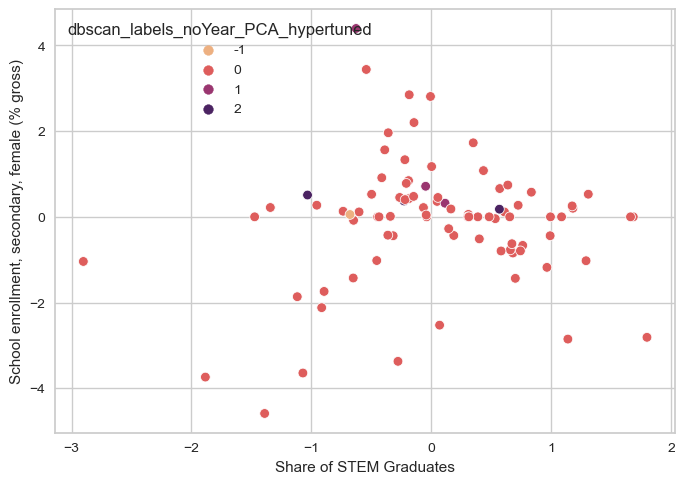

In [222]:
sns.scatterplot(data=X_noYear_ac, x='Share of STEM Graduates', y='School enrollment, secondary, female (% gross)', hue='dbscan_labels_noYear_PCA_hypertuned',palette='flare')

<Axes: xlabel='dbscan_labels_noYear_PCA_hypertuned', ylabel='Share of STEM Graduates'>

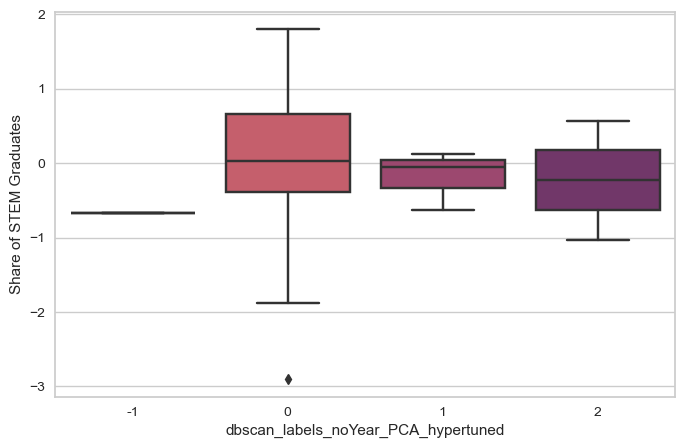

In [223]:
plt.figure(figsize=(8,5))
sns.boxplot(x='dbscan_labels_noYear_PCA_hypertuned', y='Share of STEM Graduates', data=X_noYear_ac,palette='flare')

<Axes: xlabel='Adolescent fertility rate (births per 1,000 women ages 15-19)', ylabel='School enrollment, secondary, female (% gross)'>

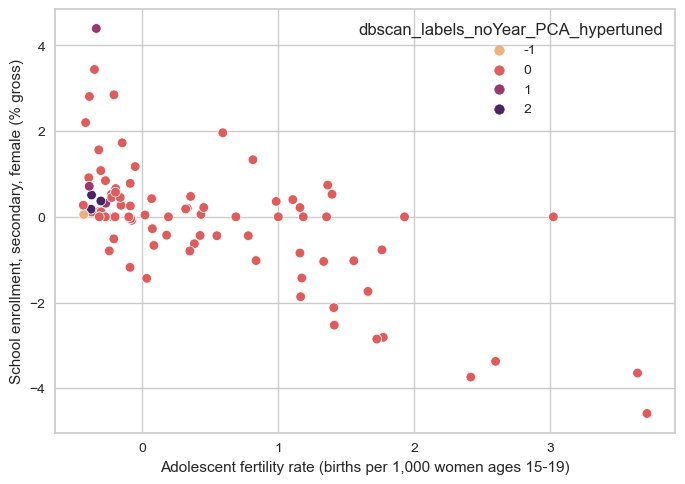

In [224]:
sns.scatterplot(data=X_noYear_ac, x='Adolescent fertility rate (births per 1,000 women ages 15-19)', y='School enrollment, secondary, female (% gross)', hue='dbscan_labels_noYear_PCA_hypertuned',palette='flare')

<Axes: xlabel='Length of paid parental leave for mother (calendar days)', ylabel='GDP per capita (Current US$)'>

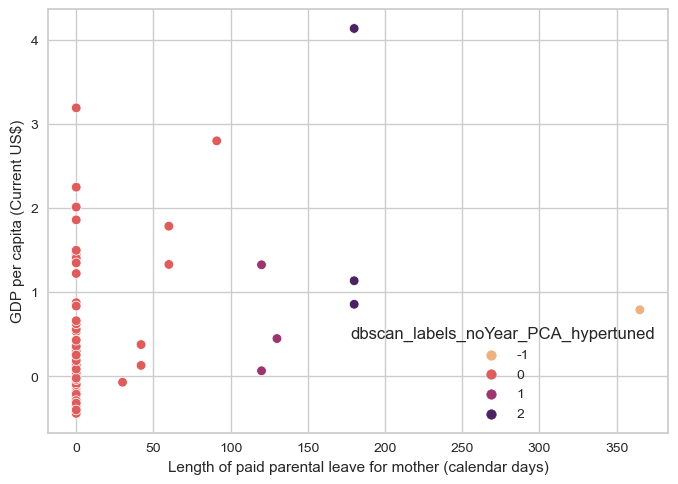

In [225]:
sns.scatterplot(data=X_noYear_ac, y='GDP per capita (Current US$)', x='Length of paid parental leave for mother (calendar days)', hue='dbscan_labels_noYear_PCA_hypertuned',palette='flare')


<Axes: xlabel='The government administers 100% of maternity leave benefits (1=yes; 0=no)', ylabel='Share of STEM Graduates'>

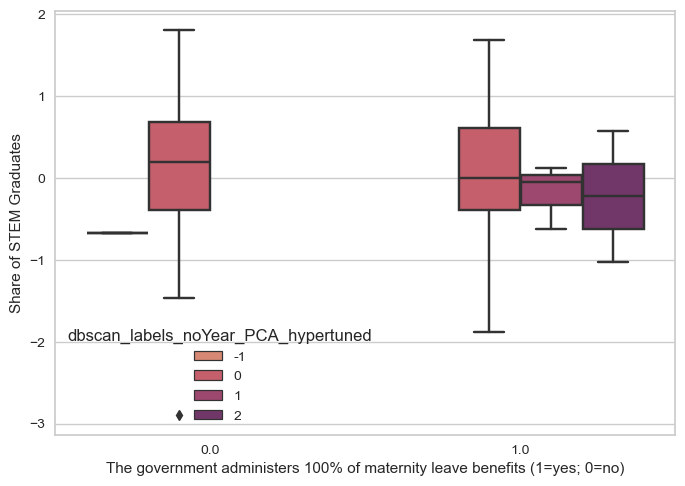

In [226]:
sns.boxplot(data=X_noYear_ac, y='Share of STEM Graduates', x='The government administers 100% of maternity leave benefits (1=yes; 0=no)', hue='dbscan_labels_noYear_PCA_hypertuned',palette='flare')

### Model Comparison

### Model 3: Final Model Visualizations

In [227]:
# dbscan_PCA_noYear = DBSCAN(eps=114, min_samples=83)

dbscan_PCA_final = DBSCAN(eps=36, min_samples=3)

# Step 2: Train the model
dbscan_PCA_final.fit(X_PCA_noYear)

# Step 3: Get predictions (cluster assignments)
y_pred_train_dbscan = dbscan_PCA_final.labels_

# Save to results DF
X_noYear_ac["dbscan_final"] = y_pred_train_dbscan

# Step 4: Evaluate the model performance
silhouette_score_train_dbscan = silhouette_score(X_PCA_noYear, y_pred_train_dbscan)

print('Silhouette score:', round(silhouette_score_train_dbscan, 3))

Silhouette score: 0.826


<Axes: xlabel='Length of paid parental leave for mother (calendar days)', ylabel='GDP per capita (Current US$)'>

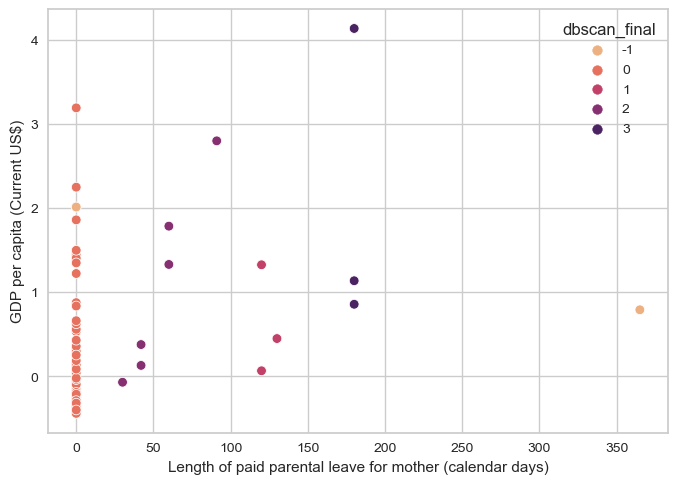

In [228]:
sns.scatterplot(data=X_noYear_ac, y='GDP per capita (Current US$)', x='Length of paid parental leave for mother (calendar days)', hue='dbscan_final',palette='flare')

<Axes: xlabel='Length of paid paternity leave (calendar days)', ylabel='Share of STEM Graduates'>

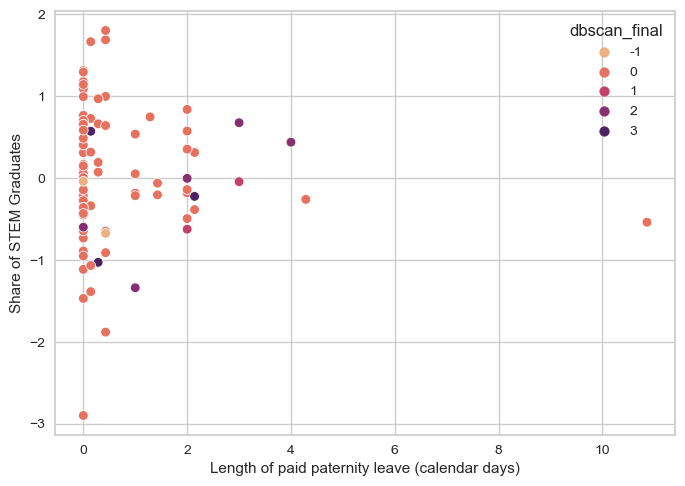

In [229]:
sns.scatterplot(data=X_noYear_ac, y='Share of STEM Graduates', x='Length of paid paternity leave (calendar days)', hue='dbscan_final',palette='flare')

<Axes: xlabel='The government administers 100% of maternity leave benefits (1=yes; 0=no)', ylabel='Share of STEM Graduates'>

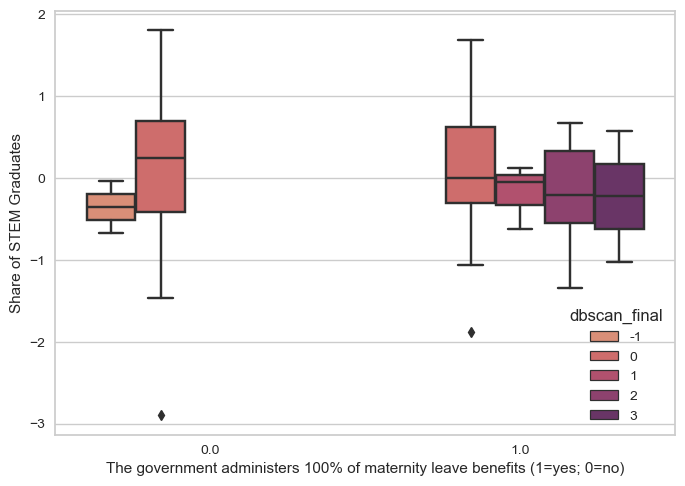

In [230]:
sns.boxplot(data=X_noYear_ac, y='Share of STEM Graduates', x='The government administers 100% of maternity leave benefits (1=yes; 0=no)', hue='dbscan_final',palette='flare')

<Axes: xlabel='Share of STEM Graduates', ylabel='Length of paid paternity leave (calendar days)'>

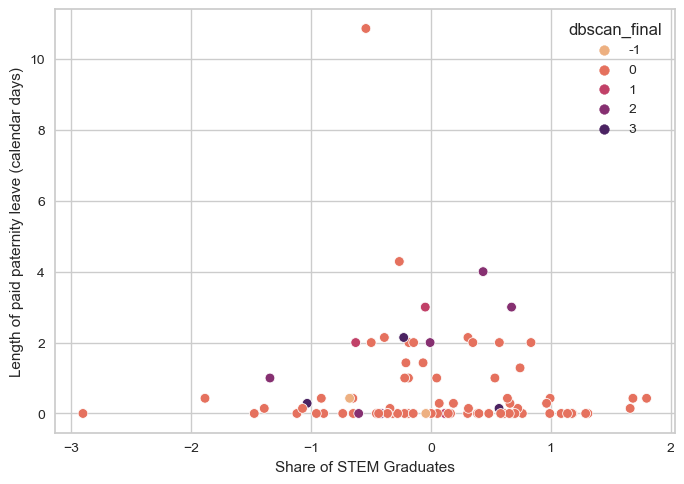

In [231]:
sns.scatterplot(data=X_noYear_ac, x='Share of STEM Graduates', y='Length of paid paternity leave (calendar days)', hue='dbscan_final',palette='flare')

<Axes: xlabel='Paid leave is available to fathers (1=yes; 0=no)', ylabel='Adolescent fertility rate (births per 1,000 women ages 15-19)'>

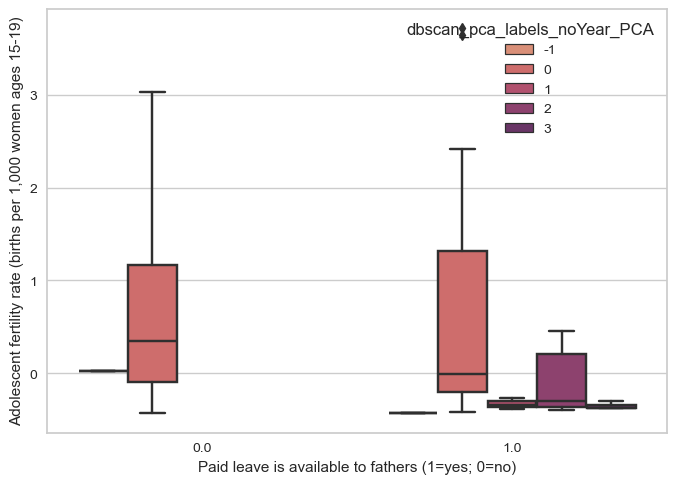

In [232]:
# Adolescent fertility rate (births per 1,000 women ages 15-19)

sns.boxplot(data=X_noYear_ac, x='Paid leave is available to fathers (1=yes; 0=no)', y='Adolescent fertility rate (births per 1,000 women ages 15-19)', hue='dbscan_pca_labels_noYear_PCA',palette='flare')

<Axes: xlabel='dbscan_final', ylabel='Share of STEM Graduates'>

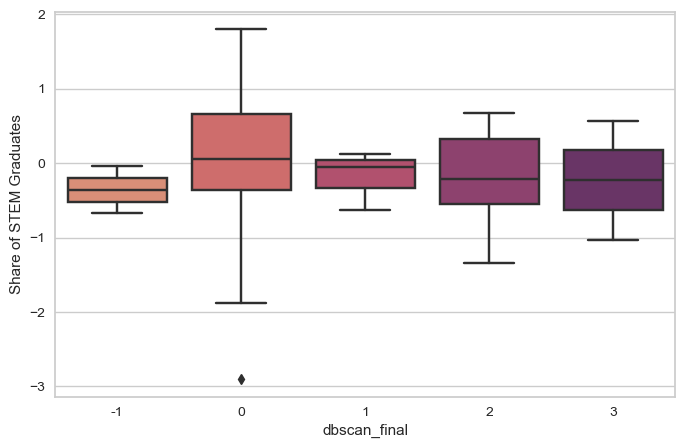

In [233]:
plt.figure(figsize=(8,5))
sns.boxplot(x='dbscan_final', y='Share of STEM Graduates', data=X_noYear_ac, palette='flare')

<Axes: xlabel='Adolescent fertility rate (births per 1,000 women ages 15-19)', ylabel='School enrollment, secondary, female (% gross)'>

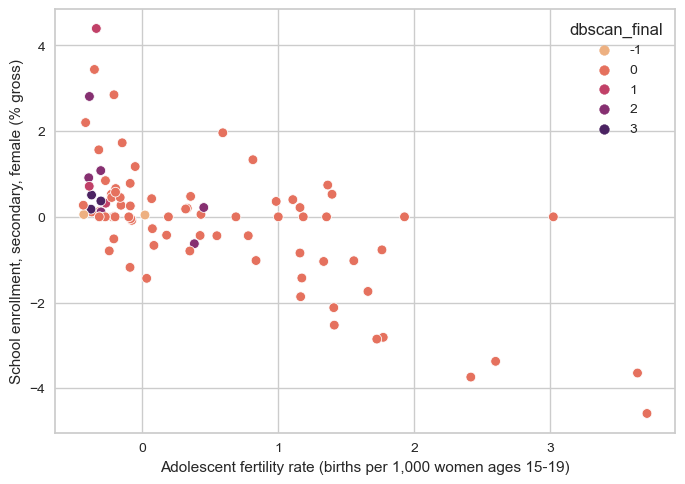

In [234]:
sns.scatterplot(data=X_noYear_ac, x='Adolescent fertility rate (births per 1,000 women ages 15-19)', y='School enrollment, secondary, female (% gross)', hue='dbscan_final',palette='flare')

In [235]:
stats = X_noYear_ac.groupby('dbscan_final').describe()

stats = stats.transpose()
stats.to_csv('stats.csv')

In [236]:
X_noYear_ac['Country'] = X_noYear_withCountry['Country']
X_noYear_ac

A woman can be head of household in the same way as a man (1=yes; 0=no)  \
11                                                    1.0                         
1086                                                  1.0                         
4310                                                  1.0                         
5396                                                  1.0                         
6471                                                  1.0                         
...                                                   ...                         
137045                                                1.0                         
138124                                                1.0                         
142423                                                1.0                         
143506                                                1.0                         
144584                                                1.0                         

        A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
11                                                    1.0                         
1086                                                  1.0                         
4310                                                  1.0                         
5396                                                  1.0                         
6471                                                  1.0                         
...                                                   ...                         
137045                                                1.0                         
138124                                                1.0                         
142423                                                1.0                         
143506                                                0.0                         
144584                                                1.0                         

        A woman can get a job in the same way as a man (1=yes; 0=no)  \
11                                                    1.0              
1086                                                  1.0              
4310                                                  1.0              
5396                                                  1.0              
6471                                                  1.0              
...                                                   ...              
137045                                                1.0              
138124                                                1.0              
142423                                                1.0              
143506                                                0.0              
144584                                                1.0              

        A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
11                                                    0.0                                 
1086                                                  1.0                                 
4310                                                  1.0                                 
5396                                                  1.0                                 
6471                                                  1.0                                 
...                                                   ...                                 
137045                                                1.0                                 
138124                                                1.0                                 
142423                                                1.0                                 
143506                                                0.0                                 
144584                                                0.0                                 

        A woman can open a bank account in the same way 

In [237]:
X_noYear_ac[X_noYear_ac['dbscan_final']==1].describe()


A woman can be head of household in the same way as a man (1=yes; 0=no)  \
count                                                3.0                         
mean                                                 1.0                         
std                                                  0.0                         
min                                                  1.0                         
25%                                                  1.0                         
50%                                                  1.0                         
75%                                                  1.0                         
max                                                  1.0                         

       A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
count                                                3.0                         
mean                                                 1.0                         
std                                                  0.0                         
min                                                  1.0                         
25%                                                  1.0                         
50%                                                  1.0                         
75%                                                  1.0                         
max                                                  1.0                         

       A woman can get a job in the same way as a man (1=yes; 0=no)  \
count                                                3.0              
mean                                                 1.0              
std                                                  0.0              
min                                                  1.0              
25%                                                  1.0              
50%                                                  1.0              
75%                                                  1.0              
max                                                  1.0              

       A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
count                                                3.0                                 
mean                                                 1.0                                 
std                                                  0.0                                 
min                                                  1.0                                 
25%                                                  1.0                                 
50%                                                  1.0                                 
75%                                                  1.0                                 
max                                                  1.0                                 

       A woman can open a bank account in the same way as a man (1=yes; 0=no)  \
count                                                3.0                        
mean                                                 1.0                        
std                                                  0.0                        
min                                                  1.0                        
25%                                                  1.0                        
50%                                                  1.0                        
75%                                                  1.0                        
max                                                  1.0                        

       A woman can register a business in the same way as a man (1=yes; 0=no)  \
count                                                3.0                        
mean                                                 1.0                        
std                                                  0.0                        
min                     

In [238]:
X_noYear_ac[X_noYear_ac['dbscan_final']==1]

A woman can be head of household in the same way as a man (1=yes; 0=no)  \
12936                                                 1.0                         
34486                                                 1.0                         
119792                                                1.0                         

        A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
12936                                                 1.0                         
34486                                                 1.0                         
119792                                                1.0                         

        A woman can get a job in the same way as a man (1=yes; 0=no)  \
12936                                                 1.0              
34486                                                 1.0              
119792                                                1.0              

        A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
12936                                                 1.0                                 
34486                                                 1.0                                 
119792                                                1.0                                 

        A woman can open a bank account in the same way as a man (1=yes; 0=no)  \
12936                                                 1.0                        
34486                                                 1.0                        
119792                                                1.0                        

        A woman can register a business in the same way as a man (1=yes; 0=no)  \
12936                                                 1.0                        
34486                                                 1.0                        
119792                                                1.0                        

        A woman can sign a contract in the same way as a man (1=yes; 0=no)  \
12936                                                 1.0                    
34486                                                 1.0                    
119792                                                1.0                    

        A woman can travel outside her home in the same way as a man (1=yes; 0=no)  \
12936                                                 1.0                            
34486                                                 1.0                            
119792                                                1.0                            

        A woman can work at night in the same way as a man (1=yes; 0=no)  \
12936                                                 1.0                  
34486                                                 1.0                  
119792                                                1.0                  

        A woman can work in a job deemed dangerous in the same way as a man (1=yes; 0=no)  \
12936                                                 1.0                                   
34486                                                 1.0                                   
119792                                                1.0                                   

        ...  There is paid parental leave (1=yes; 0=no)  \
12936   ...                                         1.0   
34486   ...                                         1.0   
119792  ...                                         1.0   

        Vocational and Technical enrolment (% of total secondary enrolment), total  \
12936                                            1.589033                            
34486                                            1.328214                            
119792                                           1.407380                            

        Share of STEM Graduates  kmeans_noYear_labels  hc_noYear_labels  \
12936                 -0.626757      

In [239]:
X_noYear_ac[X_noYear_ac['dbscan_final']==2].describe()


A woman can be head of household in the same way as a man (1=yes; 0=no)  \
count                                           6.000000                         
mean                                            0.833333                         
std                                             0.408248                         
min                                             0.000000                         
25%                                             1.000000                         
50%                                             1.000000                         
75%                                             1.000000                         
max                                             1.000000                         

       A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
count                                                6.0                         
mean                                                 1.0                         
std                                                  0.0                         
min                                                  1.0                         
25%                                                  1.0                         
50%                                                  1.0                         
75%                                                  1.0                         
max                                                  1.0                         

       A woman can get a job in the same way as a man (1=yes; 0=no)  \
count                                                6.0              
mean                                                 1.0              
std                                                  0.0              
min                                                  1.0              
25%                                                  1.0              
50%                                                  1.0              
75%                                                  1.0              
max                                                  1.0              

       A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
count                                                6.0                                 
mean                                                 1.0                                 
std                                                  0.0                                 
min                                                  1.0                                 
25%                                                  1.0                                 
50%                                                  1.0                                 
75%                                                  1.0                                 
max                                                  1.0                                 

       A woman can open a bank account in the same way as a man (1=yes; 0=no)  \
count                                                6.0                        
mean                                                 1.0                        
std                                                  0.0                        
min                                                  1.0                        
25%                                                  1.0                        
50%                                                  1.0                        
75%                                                  1.0                        
max                                                  1.0                        

       A woman can register a business in the same way as a man (1=yes; 0=no)  \
count                                                6.0                        
mean                                                 1.0                        
std                                                  0.0                        
min                     

In [240]:
X_noYear_ac[X_noYear_ac['dbscan_final']==2]

A woman can be head of household in the same way as a man (1=yes; 0=no)  \
28026                                                 0.0                         
50703                                                 1.0                         
100356                                                1.0                         
106830                                                1.0                         
110078                                                1.0                         
127338                                                1.0                         

        A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
28026                                                 1.0                         
50703                                                 1.0                         
100356                                                1.0                         
106830                                                1.0                         
110078                                                1.0                         
127338                                                1.0                         

        A woman can get a job in the same way as a man (1=yes; 0=no)  \
28026                                                 1.0              
50703                                                 1.0              
100356                                                1.0              
106830                                                1.0              
110078                                                1.0              
127338                                                1.0              

        A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
28026                                                 1.0                                 
50703                                                 1.0                                 
100356                                                1.0                                 
106830                                                1.0                                 
110078                                                1.0                                 
127338                                                1.0                                 

        A woman can open a bank account in the same way as a man (1=yes; 0=no)  \
28026                                                 1.0                        
50703                                                 1.0                        
100356                                                1.0                        
106830                                                1.0                        
110078                                                1.0                        
127338                                                1.0                        

        A woman can register a business in the same way as a man (1=yes; 0=no)  \
28026                                                 1.0                        
50703                                                 1.0                        
100356                                                1.0                        
106830                                                1.0                        
110078                                                1.0                        
127338                                                1.0                        

        A woman can sign a contract in the same way as a man (1=yes; 0=no)  \
28026                                                 0.0                    
50703                                                 1.0                    
100356                                                0.0                    
106830                                                1.0                    
110078                                                1.0                    
127338                                                1.0                    

    

In [241]:
X_noYear_ac[X_noYear_ac['dbscan_final']==0].describe()


A woman can be head of household in the same way as a man (1=yes; 0=no)  \
count                                          73.000000                         
mean                                            0.863014                         
std                                             0.346212                         
min                                             0.000000                         
25%                                             1.000000                         
50%                                             1.000000                         
75%                                             1.000000                         
max                                             1.000000                         

       A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
count                                          73.000000                         
mean                                            0.931507                         
std                                             0.254338                         
min                                             0.000000                         
25%                                             1.000000                         
50%                                             1.000000                         
75%                                             1.000000                         
max                                             1.000000                         

       A woman can get a job in the same way as a man (1=yes; 0=no)  \
count                                          73.000000              
mean                                            0.917808              
std                                             0.276557              
min                                             0.000000              
25%                                             1.000000              
50%                                             1.000000              
75%                                             1.000000              
max                                             1.000000              

       A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
count                                          73.000000                                 
mean                                            0.767123                                 
std                                             0.425589                                 
min                                             0.000000                                 
25%                                             1.000000                                 
50%                                             1.000000                                 
75%                                             1.000000                                 
max                                             1.000000                                 

       A woman can open a bank account in the same way as a man (1=yes; 0=no)  \
count                                          73.000000                        
mean                                            0.986301                        
std                                             0.117041                        
min                                             0.000000                        
25%                                             1.000000                        
50%                                             1.000000                        
75%                                             1.000000                        
max                                             1.000000                        

       A woman can register a business in the same way as a man (1=yes; 0=no)  \
count                                          73.000000                        
mean                                            0.986301                        
std                                             0.117041                        
min                     

In [242]:
X_noYear_ac[X_noYear_ac['dbscan_final']==0]

A woman can be head of household in the same way as a man (1=yes; 0=no)  \
11                                                    1.0                         
1086                                                  1.0                         
4310                                                  1.0                         
5396                                                  1.0                         
6471                                                  1.0                         
...                                                   ...                         
135956                                                0.0                         
137045                                                1.0                         
142423                                                1.0                         
143506                                                1.0                         
144584                                                1.0                         

        A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
11                                                    1.0                         
1086                                                  1.0                         
4310                                                  1.0                         
5396                                                  1.0                         
6471                                                  1.0                         
...                                                   ...                         
135956                                                0.0                         
137045                                                1.0                         
142423                                                1.0                         
143506                                                0.0                         
144584                                                1.0                         

        A woman can get a job in the same way as a man (1=yes; 0=no)  \
11                                                    1.0              
1086                                                  1.0              
4310                                                  1.0              
5396                                                  1.0              
6471                                                  1.0              
...                                                   ...              
135956                                                0.0              
137045                                                1.0              
142423                                                1.0              
143506                                                0.0              
144584                                                1.0              

        A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
11                                                    0.0                                 
1086                                                  1.0                                 
4310                                                  1.0                                 
5396                                                  1.0                                 
6471                                                  1.0                                 
...                                                   ...                                 
135956                                                0.0                                 
137045                                                1.0                                 
142423                                                1.0                                 
143506                                                0.0                                 
144584                                                0.0                                 

        A woman can open a bank account in the same way 

In [243]:
X_noYear_ac[['Country','dbscan_final']].to_csv('dbscanfinal_labels.csv')

In [244]:
import geopandas as gpd

world = gpd.read_file('ne_110m_admin_0_countries');
world = gpd.GeoDataFrame(world)

world.head()

featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL FCLASS_GR  FCLASS_IT  \
0          None          None          None      None       None   
1          None          None          None      None       None   
2  Unrecognized  Unrecognized  Unrecognized      None       None   
3          None          None          None      None       None   
4          None          None          None      None       None   

      FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
0          None      None       None      None   
1          None      None       None      None   
2  Unrecognized      None       None      None   
3          None      None       None      None   
4          None      None       None      None   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  

[5 rows x 169 columns]

In [258]:
merged_data = pd.read_csv('merged_data.csv')
import plotly.express as px

merged_data_2015 = merged_data[merged_data['Year']==2015]

# Merge 'world' dataframe with 'total_production_df' on country names
merged = world.set_index('NAME').join(merged_data_2015.set_index('Country Name'))

# Create a choropleth map
fig = px.choropleth(merged,
                    geojson=merged.geometry.__geo_interface__,
                    locations=merged.index, 
                    color='Year', 
                    color_continuous_scale='Purp', 
                    # labels={'Total Oil Production Value(2001-2022)': "Total Oil Production by Country"} 
                   )

# Update layout settings of the map
fig.update_layout(
    margin={"r":0, "t":0, "l":0, "b":0},
    coloraxis_colorbar={
        'title': "Available Data in 2015", 
        'orientation': "v",
        'len': 0.5 
    },
    paper_bgcolor='rgba(0,0,0,0)', 
    plot_bgcolor='rgba(0,0,0,0)'   
)

# Display the figure
fig.show()

In [249]:
plot_data = X_noYear_ac[['Country','dbscan_final']]

plot_data[['Country','Country Name']] = plot_data['Country'].str.split('_',n=1,expand=True)
plot_data = plot_data.drop(columns='Country')



/var/folders/gw/cl0r651n6y7fc7gtsnyjpc280000gn/T/ipykernel_85466/2025886442.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gw/cl0r651n6y7fc7gtsnyjpc280000gn/T/ipykernel_85466/2025886442.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [252]:
plot_data

dbscan_final        Country Name
11                 0             Algeria
1086               0              Angola
4310               0             Armenia
5396               0           Australia
6471               0             Austria
...              ...                 ...
137045             0      United Kingdom
138124            -1       United States
142423             0            Viet Nam
143506             0  West Bank and Gaza
144584             0            Zimbabwe

[87 rows x 2 columns]

In [256]:
merged_data = pd.read_csv('merged_data.csv')
import plotly.express as px

merged_data_2015 = merged_data[merged_data['Year']==2015]

# Merge 'world' dataframe with 'total_production_df' on country names
merged = world.set_index('NAME').join(plot_data.set_index('Country Name'))

# Create a choropleth map
fig = px.choropleth(merged,
                    geojson=merged.geometry.__geo_interface__,
                    locations=merged.index, 
                    color='dbscan_final', 
                    color_continuous_scale='Agsunset', 
                    # labels={'Total Oil Production Value(2001-2022)': "Total Oil Production by Country"} 
                   )

# Update layout settings of the map
fig.update_layout(
    margin={"r":0, "t":0, "l":0, "b":0},
    coloraxis_colorbar={
        'title': "Available Data in 2015", 
        'orientation': "v",
        'len': 0.5 
    },
    paper_bgcolor='rgba(0,0,0,0)', 
    plot_bgcolor='rgba(0,0,0,0)'   
)

# Display the figure
fig.show()